<a href="https://colab.research.google.com/github/ggkasman/Online-Food-Aggregator/blob/main/gamzegizem_kasman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Table of Contents

* [1. Introduction](#intro)
* [2. Exploratory Data Analysis](#EDA)
    * [2.1 Feature Engineering](#FE)
        * [2.1.1 Income](#income)
        * [2.1.2 Profit](#profit)
        * [2.1.3 Commission Fee](#commission-fee)
        * [2.1.4 New Service](#new-service)
    * [2.2 Descriptive Statistics](#DS)
    * [2.3 Data Visualization](#visualization)
        * [2.3.1 Distributions](#distributions)
        * [2.3.2 Outlier Detection](#outlier)
        * [2.3.3 Correlation Analysis](#correlation)
* [3. Benefit Analysis of the New Service](#benefit)
    * [3.1 New Service's Effect on Income](#benefit-new-service)
    * [3.2 New Service's Effect on gross_order_value](#benefit-gross-order)
    * [3.3 New Service's Effect on order_food_price](#benefit-food-price)
    * [3.4 New Service's Effect on pct_comission](#benefit-pct-comm)
    * [3.5 New Service's Effect on commission_fee](#benefit-comm-fee)
    * [3.6 New Service's Effect on food_rating](#benefit-food-rating)
    * [3.7 New Service's Effect on delivery_rating](#delivery-rating)
* [4. Cost Analysis of the New Service](#cost)
    * [4.1 New Service's Effect on delivery_cost](#delivery-cost)
    * [4.2 New Service's Effect on delivery_distance](#delivery-distance-cost)
    * [4.3 New Service's Effect on delivery_time_min](#delivery-time-cost)
    * [4.4 New Service's Effect on delivered_on_time](#delivered-time-cost)
* [5. Profit Analysis of the New Service](#profit-analysis)
* [6. Policy Suggestions](#policy-sugg)
* [7. References](#references)

## 1. Introduction <a class="anchor" id="intro"></a>

In this project I am trying to find out if the online food aggregator should implement the new service or not.

First, I will have a look at the dataset and make exploratory analysis. Then I will make benefit and cost analysis to see if the new service bring improvements in these aspects. After benefit-cost analyses I will make a brief profit analysis and analyze the effect of the new service on the profits of the firm.

Lastly, relying on the results of my analysis, I will make some policy suggestions for the company.

![image-2.png](attachment:image-2.png)
Source: https://jungleworks.com/on-demand-food-delivery-apps-are-making-the-life-easier/

**The Dataset**

The dataset contains an online delivery company's data for City A, B and C.

Detailed explanation for the variables in the dataset are given in the table below.

![image-2.png](attachment:image-2.png)

## 2. Exploratory Data Analysis <a class="anchor" id="EDA"></a>

In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from sklearn import datasets
from IPython.display import display, HTML
from scipy.stats import pearsonr
import warnings
warnings.simplefilter(action='ignore', category=Warning)

# settings
%matplotlib inline
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", None)
sns.set_style("darkgrid")
plt.style.use("seaborn")

In [ ]:
df = pd.read_excel("/Users/gamzekasman/Desktop/ADS 575 Midterm/Final Exam/datset.xlsx")
df.head()

,city,customer_id,order_date,customer_n_th_order,order_id,restaurant_id,cuisine_type,device_type,order_uses_new_service,customer_segment,delivery_status,delivery_distance,delivery_time_min,delivered_on_time,order_food_price,delivery_fee,gross_order_value,pct_comission,delivery_cost,food_rating,delivery_rating
0,CityA,c3daaf9116,2022-02-02,1,31fb964dde4a173,afd357fd,Other,Mobile,No,non-adopter,Delivered,1067,49.0,Yes,8.925,1.99,10.915,0.254695,8.22,4,4
1,CityB,153b7bc1dc,2021-12-27,1,f9d56f014fa8f9e,7094d545,Drinks and Ice-cream,Mobile,No,non-adopter,Delivered,1960,54.0,Yes,14.637,0.00,14.637,0.282162,9.05,5,5
2,CityA,1fb32f6de0,2022-01-04,1,97e1d723908531a,ec0d867f,Other,Mobile,No,non-adopter,Delivered,2180,28.0,Yes,11.475,1.99,13.465,0.291125,4.74,4,5
3,CityA,1fb32f6de0,2022-01-23,2,b421d0efbe35c44,b62bd478,Other,Mobile,No,non-adopter,Delivered,1973,70.0,Yes,42.160,1.99,44.150,0.337033,17.63,5,5
4,CityA,b99530f449,2022-01-20,1,3d17b76c9bdaa96,bd4a8954,Mediterranean,Mobile,No,non-adopter,Delivered,880,60.0,Yes,16.405,1.99,18.395,0.314759,10.05,5,5


In [ ]:
df.shape

(5000, 21)

In the raw dataset we have 21 variables and 5,000 observations.

In [ ]:
#names of the variables
df.columns

Index(['city', 'customer_id', 'order_date', 'customer_n_th_order', 'order_id',
       'restaurant_id', 'cuisine_type', 'device_type',
       'order_uses_new_service', 'customer_segment', 'delivery_status',
       'delivery_distance', 'delivery_time_min', 'delivered_on_time',
       'order_food_price', 'delivery_fee', 'gross_order_value',
       'pct_comission', 'delivery_cost', 'food_rating', 'delivery_rating'],
      dtype='object')

In [ ]:
#Checking for missing or null values in the data set.
print(df.isnull().any())

city                      False
customer_id               False
order_date                False
customer_n_th_order       False
order_id                  False
restaurant_id             False
cuisine_type              False
device_type               False
order_uses_new_service    False
customer_segment          False
delivery_status           False
delivery_distance         False
delivery_time_min          True
delivered_on_time         False
order_food_price          False
delivery_fee              False
gross_order_value         False
pct_comission             False
delivery_cost              True
food_rating               False
delivery_rating           False
dtype: bool


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    5000 non-null   object 
 1   customer_id             5000 non-null   object 
 2   order_date              5000 non-null   object 
 3   customer_n_th_order     5000 non-null   int64  
 4   order_id                5000 non-null   object 
 5   restaurant_id           5000 non-null   object 
 6   cuisine_type            5000 non-null   object 
 7   device_type             5000 non-null   object 
 8   order_uses_new_service  5000 non-null   object 
 9   customer_segment        5000 non-null   object 
 10  delivery_status         5000 non-null   object 
 11  delivery_distance       5000 non-null   int64  
 12  delivery_time_min       4998 non-null   float64
 13  delivered_on_time       5000 non-null   object 
 14  order_food_price        5000 non-null   

We have 2 missing values in the columns "delivery_time_min" and "delivery_cost". I drop these observations below.

In [ ]:
#Dropping missing values
df=df.dropna()

In [ ]:
#Checking for duplications, it seems there is no duplicated observation
df.duplicated().sum()

0

In [ ]:
num_cols = ['customer_n_th_order', 'delivery_distance', 'delivery_time_min', 'order_food_price',
       'delivery_fee', 'gross_order_value', 'pct_comission','delivery_cost',  'food_rating',
            'delivery_rating']
num_df = df[num_cols]

In [ ]:
df.groupby(['city'])['customer_n_th_order', 'delivery_distance', 'delivery_time_min', 'order_food_price',
       'delivery_fee', 'gross_order_value', 'pct_comission','delivery_cost',  'food_rating',
            'delivery_rating'].mean()

,customer_n_th_order,delivery_distance,delivery_time_min,order_food_price,delivery_fee,gross_order_value,pct_comission,delivery_cost,food_rating,delivery_rating
city,,,,,,,,,,
CityA,1.905689,2134.299401,50.382859,20.274447,2.074869,22.349316,0.295501,9.752919,4.005614,3.883982
CityB,1.993373,2368.049337,45.321797,22.328442,2.092909,24.421351,0.292940,8.800869,4.091311,4.047865
CityC,2.428719,1949.679752,45.545455,22.353314,1.922810,24.276124,0.293986,8.980981,4.118802,4.077479


In [ ]:
#Drop the columns that will be no use in the analyses
df = df.drop(columns=['customer_id', 'order_id', 'restaurant_id'], axis=1)

### 2.1. Feature Engineering  <a class="anchor" id="FE"></a>

We will create some features for the sake of our analyses.

#### 2.1.1 Income  <a class="anchor" id="income"></a>

In [ ]:
#Creating the variable "income" first
df['income']= df['delivery_fee'] + (df['order_food_price'] * df['pct_comission'])
df.head()

,city,order_date,customer_n_th_order,cuisine_type,device_type,order_uses_new_service,customer_segment,delivery_status,delivery_distance,delivery_time_min,delivered_on_time,order_food_price,delivery_fee,gross_order_value,pct_comission,delivery_cost,food_rating,delivery_rating,income
0,CityA,2022-02-02,1,Other,Mobile,No,non-adopter,Delivered,1067,49.0,Yes,8.925,1.99,10.915,0.254695,8.22,4,4,4.263156
1,CityB,2021-12-27,1,Drinks and Ice-cream,Mobile,No,non-adopter,Delivered,1960,54.0,Yes,14.637,0.00,14.637,0.282162,9.05,5,5,4.130000
2,CityA,2022-01-04,1,Other,Mobile,No,non-adopter,Delivered,2180,28.0,Yes,11.475,1.99,13.465,0.291125,4.74,4,5,5.330661
3,CityA,2022-01-23,2,Other,Mobile,No,non-adopter,Delivered,1973,70.0,Yes,42.160,1.99,44.150,0.337033,17.63,5,5,16.199305
4,CityA,2022-01-20,1,Mediterranean,Mobile,No,non-adopter,Delivered,880,60.0,Yes,16.405,1.99,18.395,0.314759,10.05,5,5,7.153629


#### 2.1.2 Profit  <a class="anchor" id="profit"></a>

In [ ]:
#Now creating the "profit" and dropping the income as we will not need it in our analyses later
df['profit']=df['income']- df['delivery_cost']

df.head()

,city,order_date,customer_n_th_order,cuisine_type,device_type,order_uses_new_service,customer_segment,delivery_status,delivery_distance,delivery_time_min,delivered_on_time,order_food_price,delivery_fee,gross_order_value,pct_comission,delivery_cost,food_rating,delivery_rating,income,profit
0,CityA,2022-02-02,1,Other,Mobile,No,non-adopter,Delivered,1067,49.0,Yes,8.925,1.99,10.915,0.254695,8.22,4,4,4.263156,-3.956844
1,CityB,2021-12-27,1,Drinks and Ice-cream,Mobile,No,non-adopter,Delivered,1960,54.0,Yes,14.637,0.00,14.637,0.282162,9.05,5,5,4.130000,-4.920000
2,CityA,2022-01-04,1,Other,Mobile,No,non-adopter,Delivered,2180,28.0,Yes,11.475,1.99,13.465,0.291125,4.74,4,5,5.330661,0.590661
3,CityA,2022-01-23,2,Other,Mobile,No,non-adopter,Delivered,1973,70.0,Yes,42.160,1.99,44.150,0.337033,17.63,5,5,16.199305,-1.430695
4,CityA,2022-01-20,1,Mediterranean,Mobile,No,non-adopter,Delivered,880,60.0,Yes,16.405,1.99,18.395,0.314759,10.05,5,5,7.153629,-2.896371


#### 2.1.3 Commission Fee  <a class="anchor" id="commission-fee"></a>

In [ ]:
#Creating a new column "commission_fee"
df['commission_fee']= df['order_food_price']*df['pct_comission']
df.head()

,city,order_date,customer_n_th_order,cuisine_type,device_type,order_uses_new_service,customer_segment,delivery_status,delivery_distance,delivery_time_min,delivered_on_time,order_food_price,delivery_fee,gross_order_value,pct_comission,delivery_cost,food_rating,delivery_rating,income,profit,commission_fee
0,CityA,2022-02-02,1,Other,Mobile,No,non-adopter,Delivered,1067,49.0,Yes,8.925,1.99,10.915,0.254695,8.22,4,4,4.263156,-3.956844,2.273156
1,CityB,2021-12-27,1,Drinks and Ice-cream,Mobile,No,non-adopter,Delivered,1960,54.0,Yes,14.637,0.00,14.637,0.282162,9.05,5,5,4.130000,-4.920000,4.130000
2,CityA,2022-01-04,1,Other,Mobile,No,non-adopter,Delivered,2180,28.0,Yes,11.475,1.99,13.465,0.291125,4.74,4,5,5.330661,0.590661,3.340661
3,CityA,2022-01-23,2,Other,Mobile,No,non-adopter,Delivered,1973,70.0,Yes,42.160,1.99,44.150,0.337033,17.63,5,5,16.199305,-1.430695,14.209305
4,CityA,2022-01-20,1,Mediterranean,Mobile,No,non-adopter,Delivered,880,60.0,Yes,16.405,1.99,18.395,0.314759,10.05,5,5,7.153629,-2.896371,5.163629


#### 2.1.4 New Service <a class="anchor" id="new-service"></a>

For the orders using new service we will have 1 column: new_service_user. 

Orders not using the new service will be represented by the column of zeros.

In [ ]:
type_dummies = pd.get_dummies(df['order_uses_new_service'],drop_first=True)  
df = pd.concat([df,type_dummies],axis=1)

df.head()

,city,order_date,customer_n_th_order,cuisine_type,device_type,order_uses_new_service,customer_segment,delivery_status,delivery_distance,delivery_time_min,delivered_on_time,order_food_price,delivery_fee,gross_order_value,pct_comission,delivery_cost,food_rating,delivery_rating,income,profit,commission_fee,Yes
0,CityA,2022-02-02,1,Other,Mobile,No,non-adopter,Delivered,1067,49.0,Yes,8.925,1.99,10.915,0.254695,8.22,4,4,4.263156,-3.956844,2.273156,0
1,CityB,2021-12-27,1,Drinks and Ice-cream,Mobile,No,non-adopter,Delivered,1960,54.0,Yes,14.637,0.00,14.637,0.282162,9.05,5,5,4.130000,-4.920000,4.130000,0
2,CityA,2022-01-04,1,Other,Mobile,No,non-adopter,Delivered,2180,28.0,Yes,11.475,1.99,13.465,0.291125,4.74,4,5,5.330661,0.590661,3.340661,0
3,CityA,2022-01-23,2,Other,Mobile,No,non-adopter,Delivered,1973,70.0,Yes,42.160,1.99,44.150,0.337033,17.63,5,5,16.199305,-1.430695,14.209305,0
4,CityA,2022-01-20,1,Mediterranean,Mobile,No,non-adopter,Delivered,880,60.0,Yes,16.405,1.99,18.395,0.314759,10.05,5,5,7.153629,-2.896371,5.163629,0


In [ ]:
#Renaming the column
df.rename(columns={'Yes':'new_service_user'}, inplace = True)
df.head()

,city,order_date,customer_n_th_order,cuisine_type,device_type,order_uses_new_service,customer_segment,delivery_status,delivery_distance,delivery_time_min,delivered_on_time,order_food_price,delivery_fee,gross_order_value,pct_comission,delivery_cost,food_rating,delivery_rating,income,profit,commission_fee,new_service_user
0,CityA,2022-02-02,1,Other,Mobile,No,non-adopter,Delivered,1067,49.0,Yes,8.925,1.99,10.915,0.254695,8.22,4,4,4.263156,-3.956844,2.273156,0
1,CityB,2021-12-27,1,Drinks and Ice-cream,Mobile,No,non-adopter,Delivered,1960,54.0,Yes,14.637,0.00,14.637,0.282162,9.05,5,5,4.130000,-4.920000,4.130000,0
2,CityA,2022-01-04,1,Other,Mobile,No,non-adopter,Delivered,2180,28.0,Yes,11.475,1.99,13.465,0.291125,4.74,4,5,5.330661,0.590661,3.340661,0
3,CityA,2022-01-23,2,Other,Mobile,No,non-adopter,Delivered,1973,70.0,Yes,42.160,1.99,44.150,0.337033,17.63,5,5,16.199305,-1.430695,14.209305,0
4,CityA,2022-01-20,1,Mediterranean,Mobile,No,non-adopter,Delivered,880,60.0,Yes,16.405,1.99,18.395,0.314759,10.05,5,5,7.153629,-2.896371,5.163629,0


### 2.2 Descriptive Statistics <a class="anchor" id="DS"></a>

In [ ]:
df.describe()

,customer_n_th_order,delivery_distance,delivery_time_min,order_food_price,delivery_fee,gross_order_value,pct_comission,delivery_cost,food_rating,delivery_rating,income,profit,commission_fee,new_service_user
count,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000
mean,2.030812,2162.054622,48.070828,21.235165,2.050320,23.285485,0.294512,9.344732,4.050820,3.965986,8.437698,-0.907034,6.387378,0.189076
std,2.743495,1147.968390,20.224609,12.896180,0.843863,12.983639,0.030251,4.576300,1.377591,1.504860,4.346791,6.131430,4.205838,0.391608
min,1.000000,0.000000,8.000000,8.500000,0.000000,8.500000,0.124378,1.360000,1.000000,1.000000,1.420000,-25.850000,1.246281,0.000000
25%,1.000000,1279.000000,36.000000,12.522625,1.990000,14.491375,0.280535,6.110000,3.000000,3.000000,5.529519,-4.037812,3.512210,0.000000
50%,1.000000,2040.000000,42.000000,18.275000,1.990000,20.265000,0.297136,8.290000,5.000000,5.000000,7.448610,-0.676226,5.351549,0.000000
75%,2.000000,2940.500000,59.000000,26.180000,2.990000,28.255000,0.317385,11.500000,5.000000,5.000000,10.159451,2.306694,7.969115,0.000000
max,30.000000,12984.000000,119.000000,323.977500,3.900000,325.967500,0.409921,29.970000,5.000000,5.000000,92.911523,86.801523,90.921523,1.000000


Main observations from the table above are:

- On average customers gave 2 orders from the app.
- On average delivery distance is 2,162 metres.
- On average an order is delivered in 48 minutes.
- The average price of food is 21 Euros.
- The average delivery fee is 2 Euros.
- The average gross order value is 23 Euros.
- On average the firm takes 3% commission.
- On average delivery cost is 9 Euros. Please note that the cost of delivery is way below than delivery fee.
- Average food rating is 4.
- Average delivery rating is also 4 but is slighlty less than the food rating.
- Average income of the firm for an order is 8 Euros.
- Average profit of the firm from an order is -1 Euros which means on average the online food delivery company makes loss at each order.

From the initial findings it seems that the company is making loss due to high delivery costs. The company falls short of charging enough delivery fee to make profits. 

In this project, I will try to see if the new service is any good for the company and whether it brings additional value and helps in making profit.

### 2.3 Data Visualization <a class="anchor" id="visualization"></a>

#### 2.3.1 Distributions <a class="anchor" id="distributions"></a>

**Categorical Variables**

In [ ]:
def count_pie(data, col, hue = None, ax = None):
    """
    This function draws a categorical column in count plot and pie plot.
    
    arguments \
    data: dataframe.
    col: col to visualize.
    hue: if you want to add a second variable.
    """
    # draw the count plot
    count =sns.countplot(data = df, x  = col, hue = hue ,palette = "pastel", ax = ax[0])
        # annotating
    for p in count.patches:
        count.annotate("{:.0f}".format(p.get_height()), (p.get_x() + 0.3, p.get_height() + 1), 
                       ha = "center", va = "bottom", color = "black", fontname = "monospace", fontsize = 15, weight = "bold")
    
    # draw pie plot
    labels = data[col].value_counts().sort_index().index
    data = data[col].value_counts().sort_index().values
    colors = sns.color_palette("pastel")[:len(labels)]
    _, labels_lst, percentage_labels_lst = ax[1].pie(data, labels = labels, colors = colors, autopct = "%0.0f%%",
              explode = [0.03 for i in range(len(labels))] )
    
    # labels
    
        # count plot
    count.set_xlabel(f"{col} Count plot", weight = "semibold", fontname = "monospace", fontsize = 15)
    count.set_ylabel("Count", weight = "semibold", fontname = "monospace", fontsize = 15)
    count.set_xticklabels(labels, fontsize = 15, weight = "bold")
    count.set_title(f"{col} count plot", weight = "bold", fontname = "monospace", fontsize = 25)
        # pie plot
    ax[1].set_xlabel(f"{col} Pie plot", weight = "semibold", fontname = "monospace", fontsize = 15)
    for label in labels_lst[:len(labels)]:
        label.update({"weight": "bold", "fontsize":15})
    for label in percentage_labels_lst[:len(labels)]:
        label.update({"weight": "bold", "fontsize":15})

    ax[1].legend(loc = "upper left", frameon = True, prop = {"size":15}, bbox_to_anchor = (1.05, 1))
    ax[1].set_title(f"{col} pie plot", weight = "bold", fontname = "monospace", fontsize = 25)

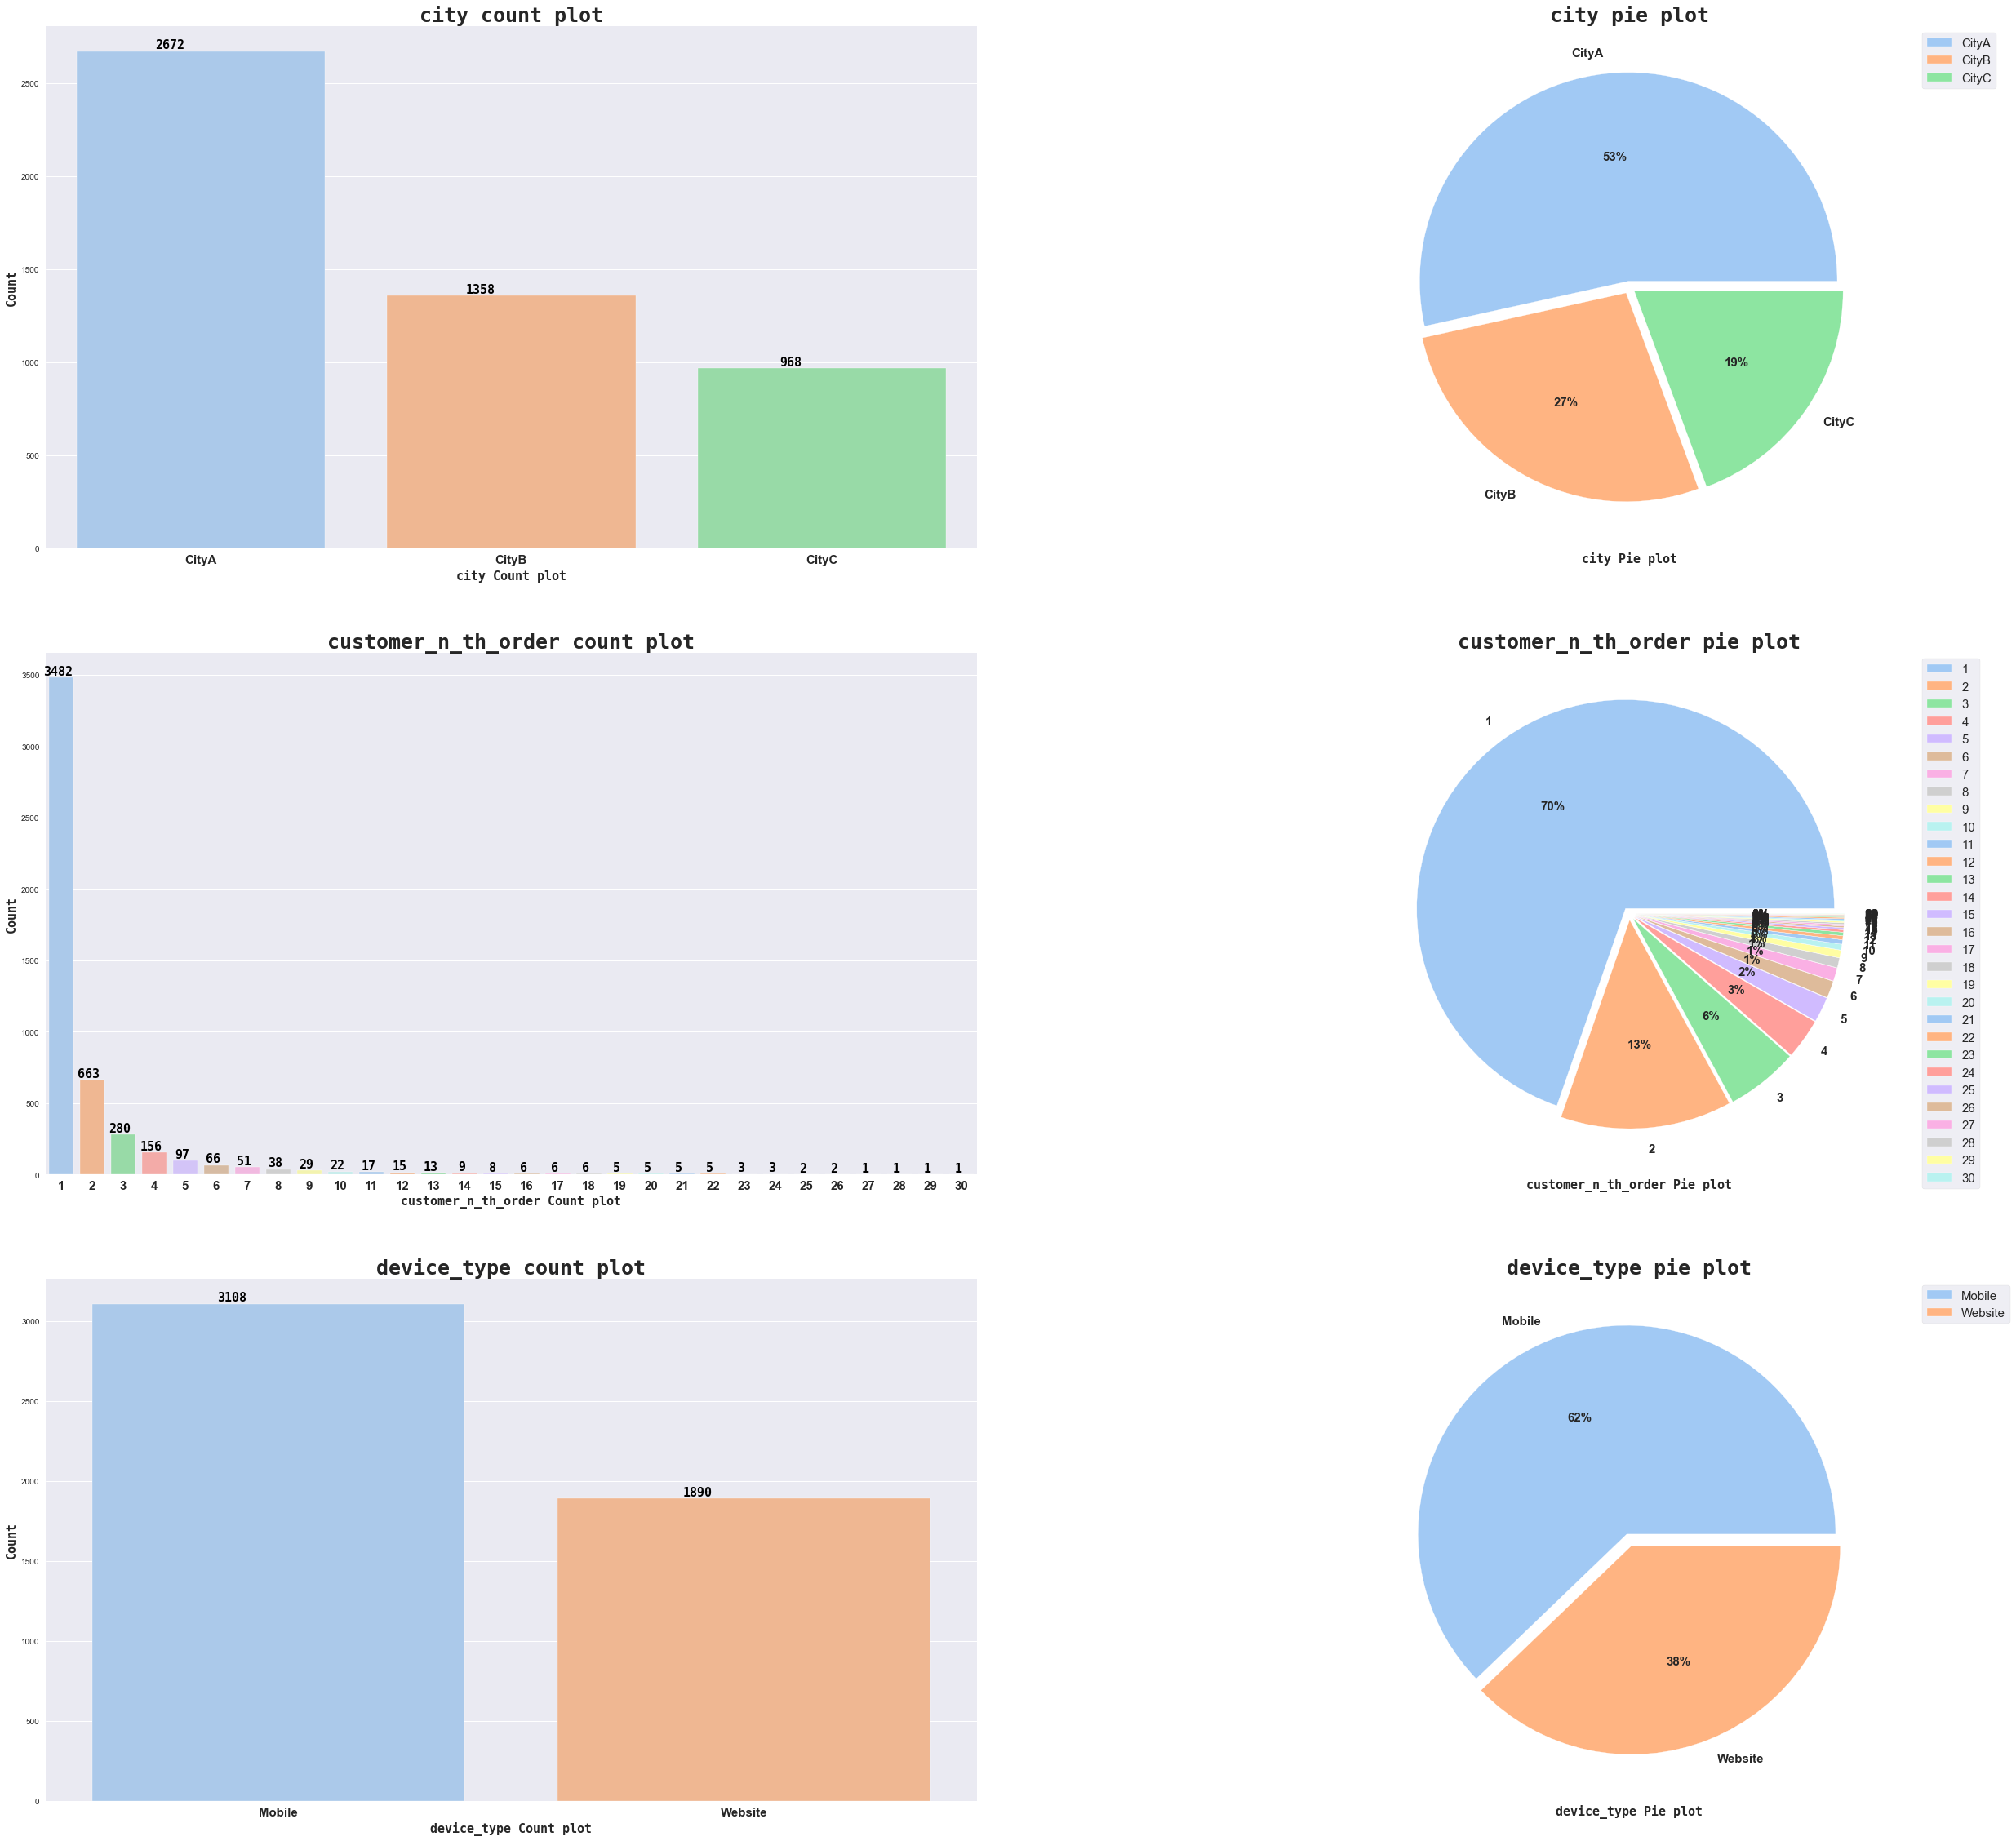

In [ ]:
cat_cols = ["city","customer_n_th_order","device_type"]
fig, ax = plt.subplots(3, 2, figsize = (45, 40))
for i, col in enumerate(cat_cols):
    count_pie(df, col, ax = (ax[i % 3, i//3], ax[i%3, i//3 + 1]))

We can see from the count plots and pie charts that:
- City A has more orders than City B and City C. 53% of the orders were given in City A. This finding suggests that City A could be a bigger city.
- Most customers (70%) has given just one order from the online food app.
- Customer have used mostly the mobile app (62%) for the orders.

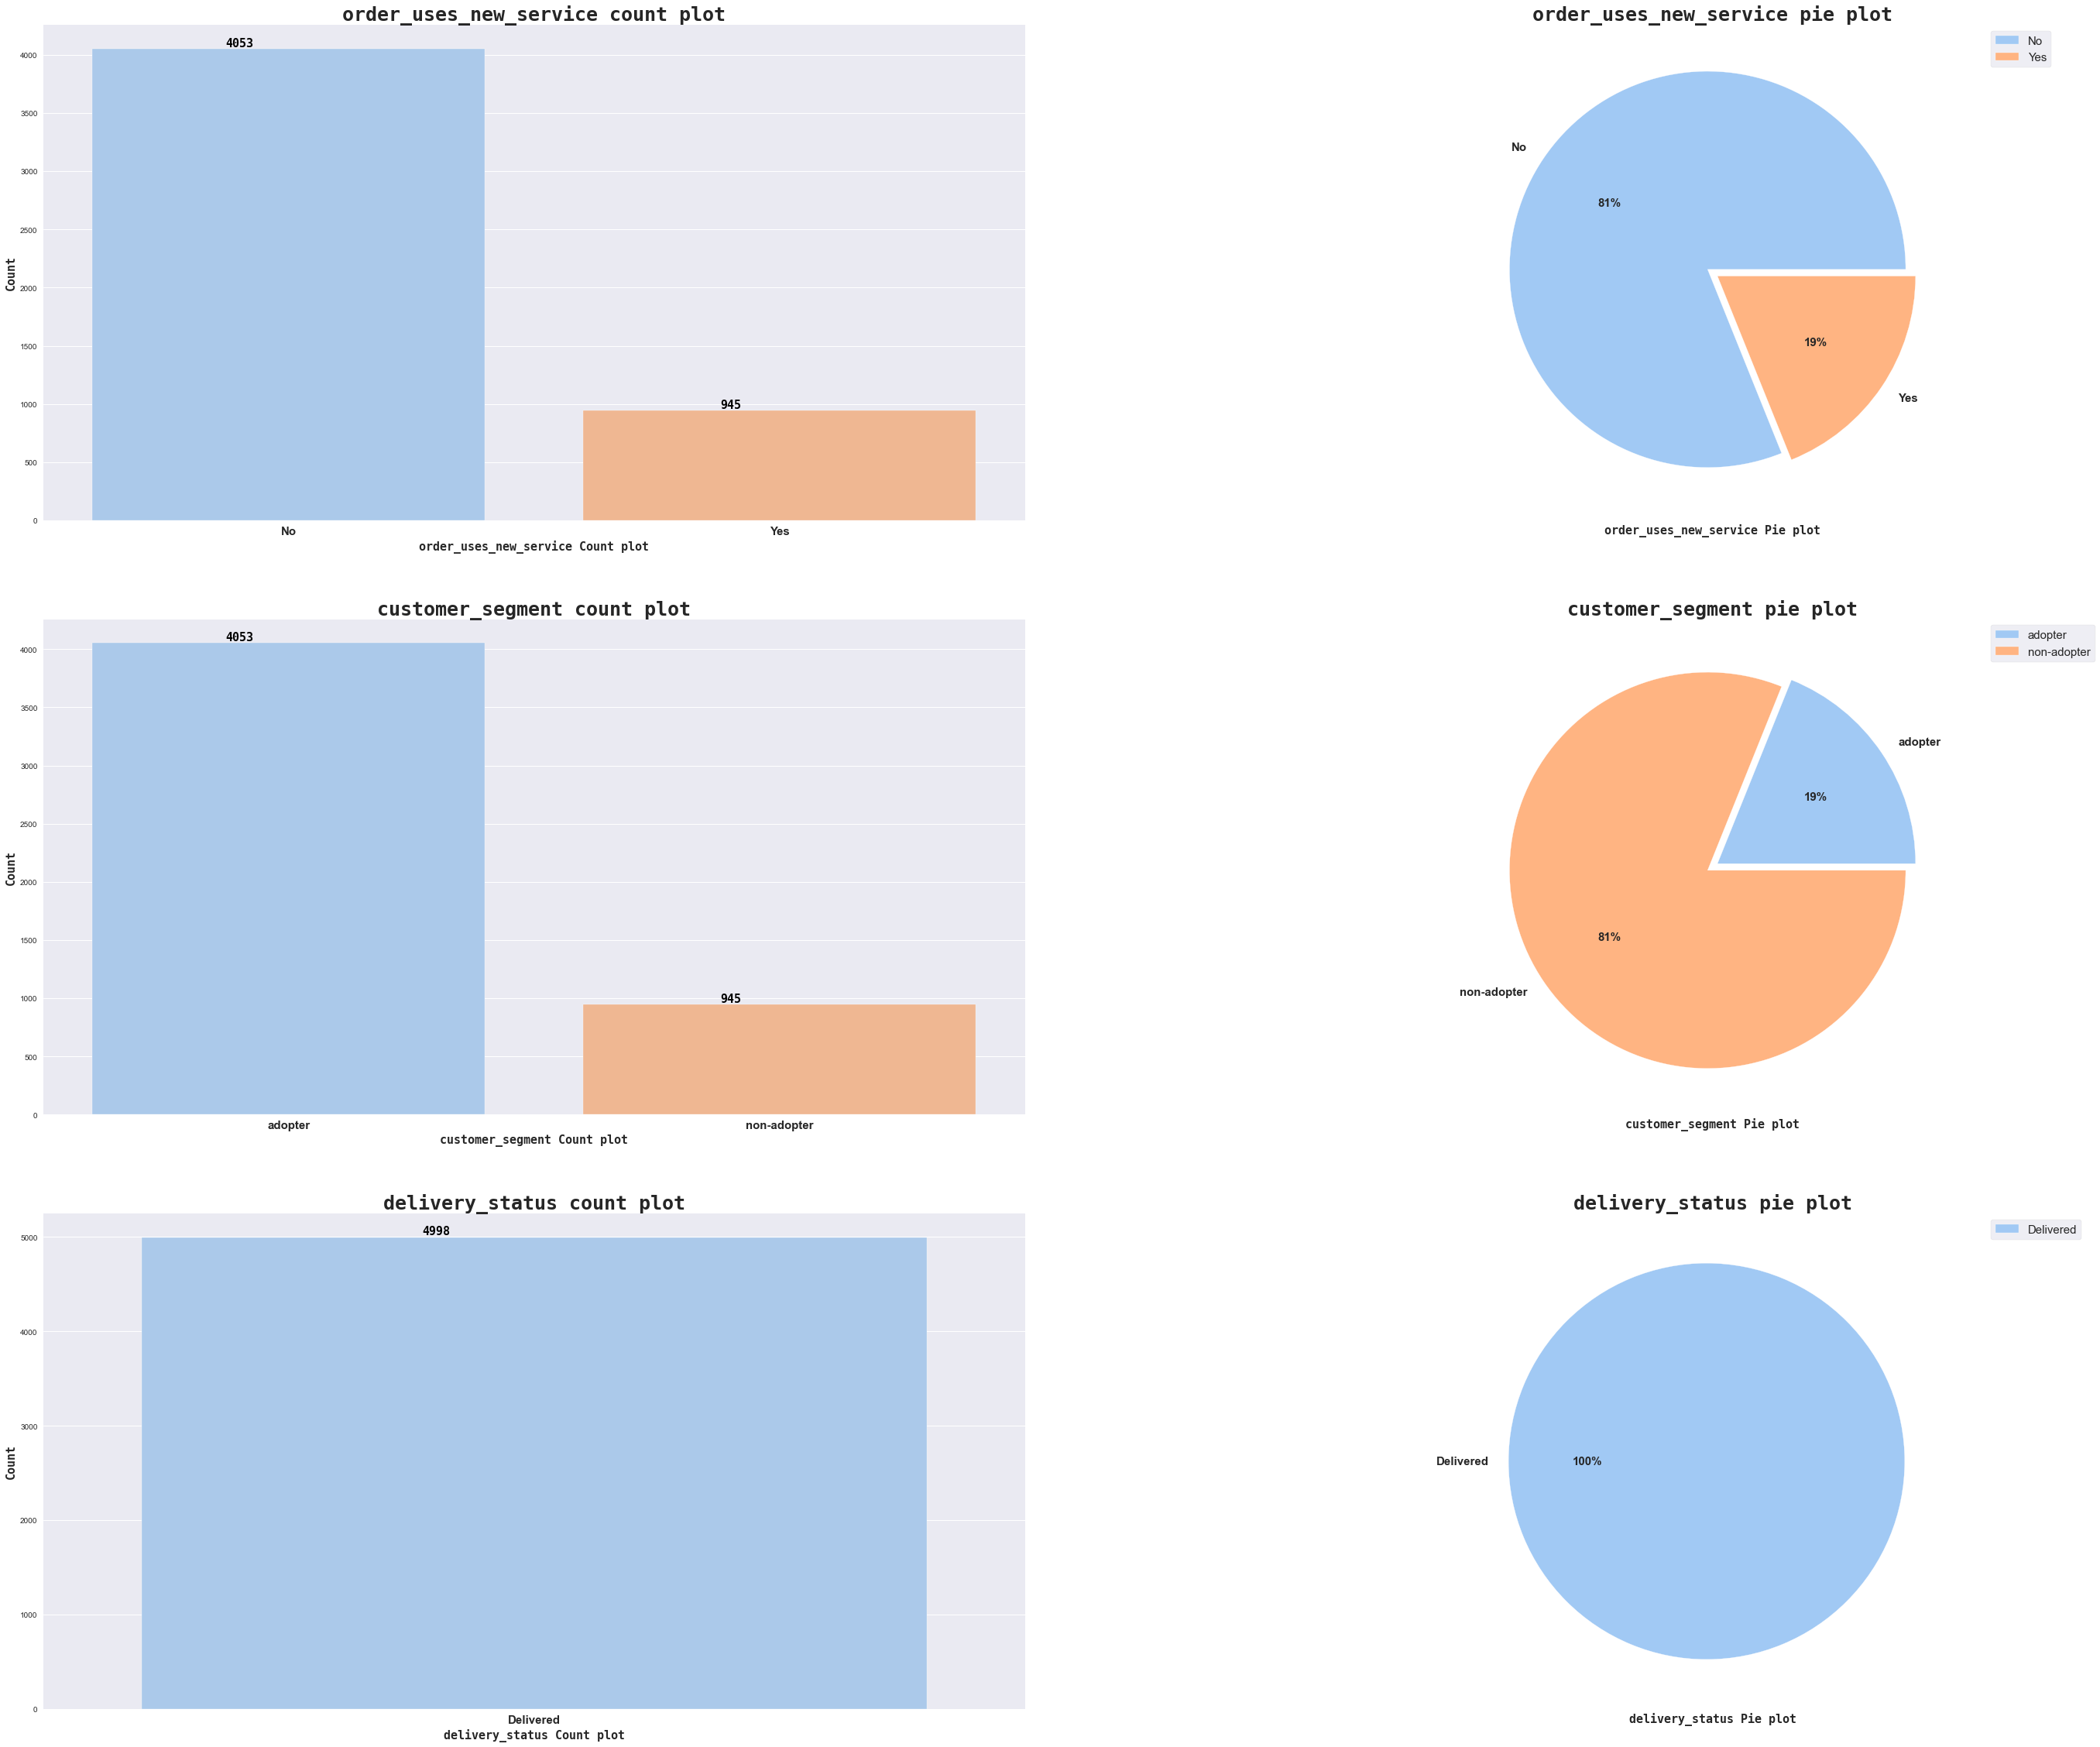

In [ ]:
cat_cols = ["order_uses_new_service","customer_segment", "delivery_status"]
fig, ax = plt.subplots(3, 2, figsize = (50, 40))
for i, col in enumerate(cat_cols):
    count_pie(df, col, ax = (ax[i % 3, i//3], ax[i%3, i//3 + 1]))

- Customers have used the new feature only for 19% of the orders.
- 81% of the customers are in the segment of non-adapters.
- All of the orders are delivered.

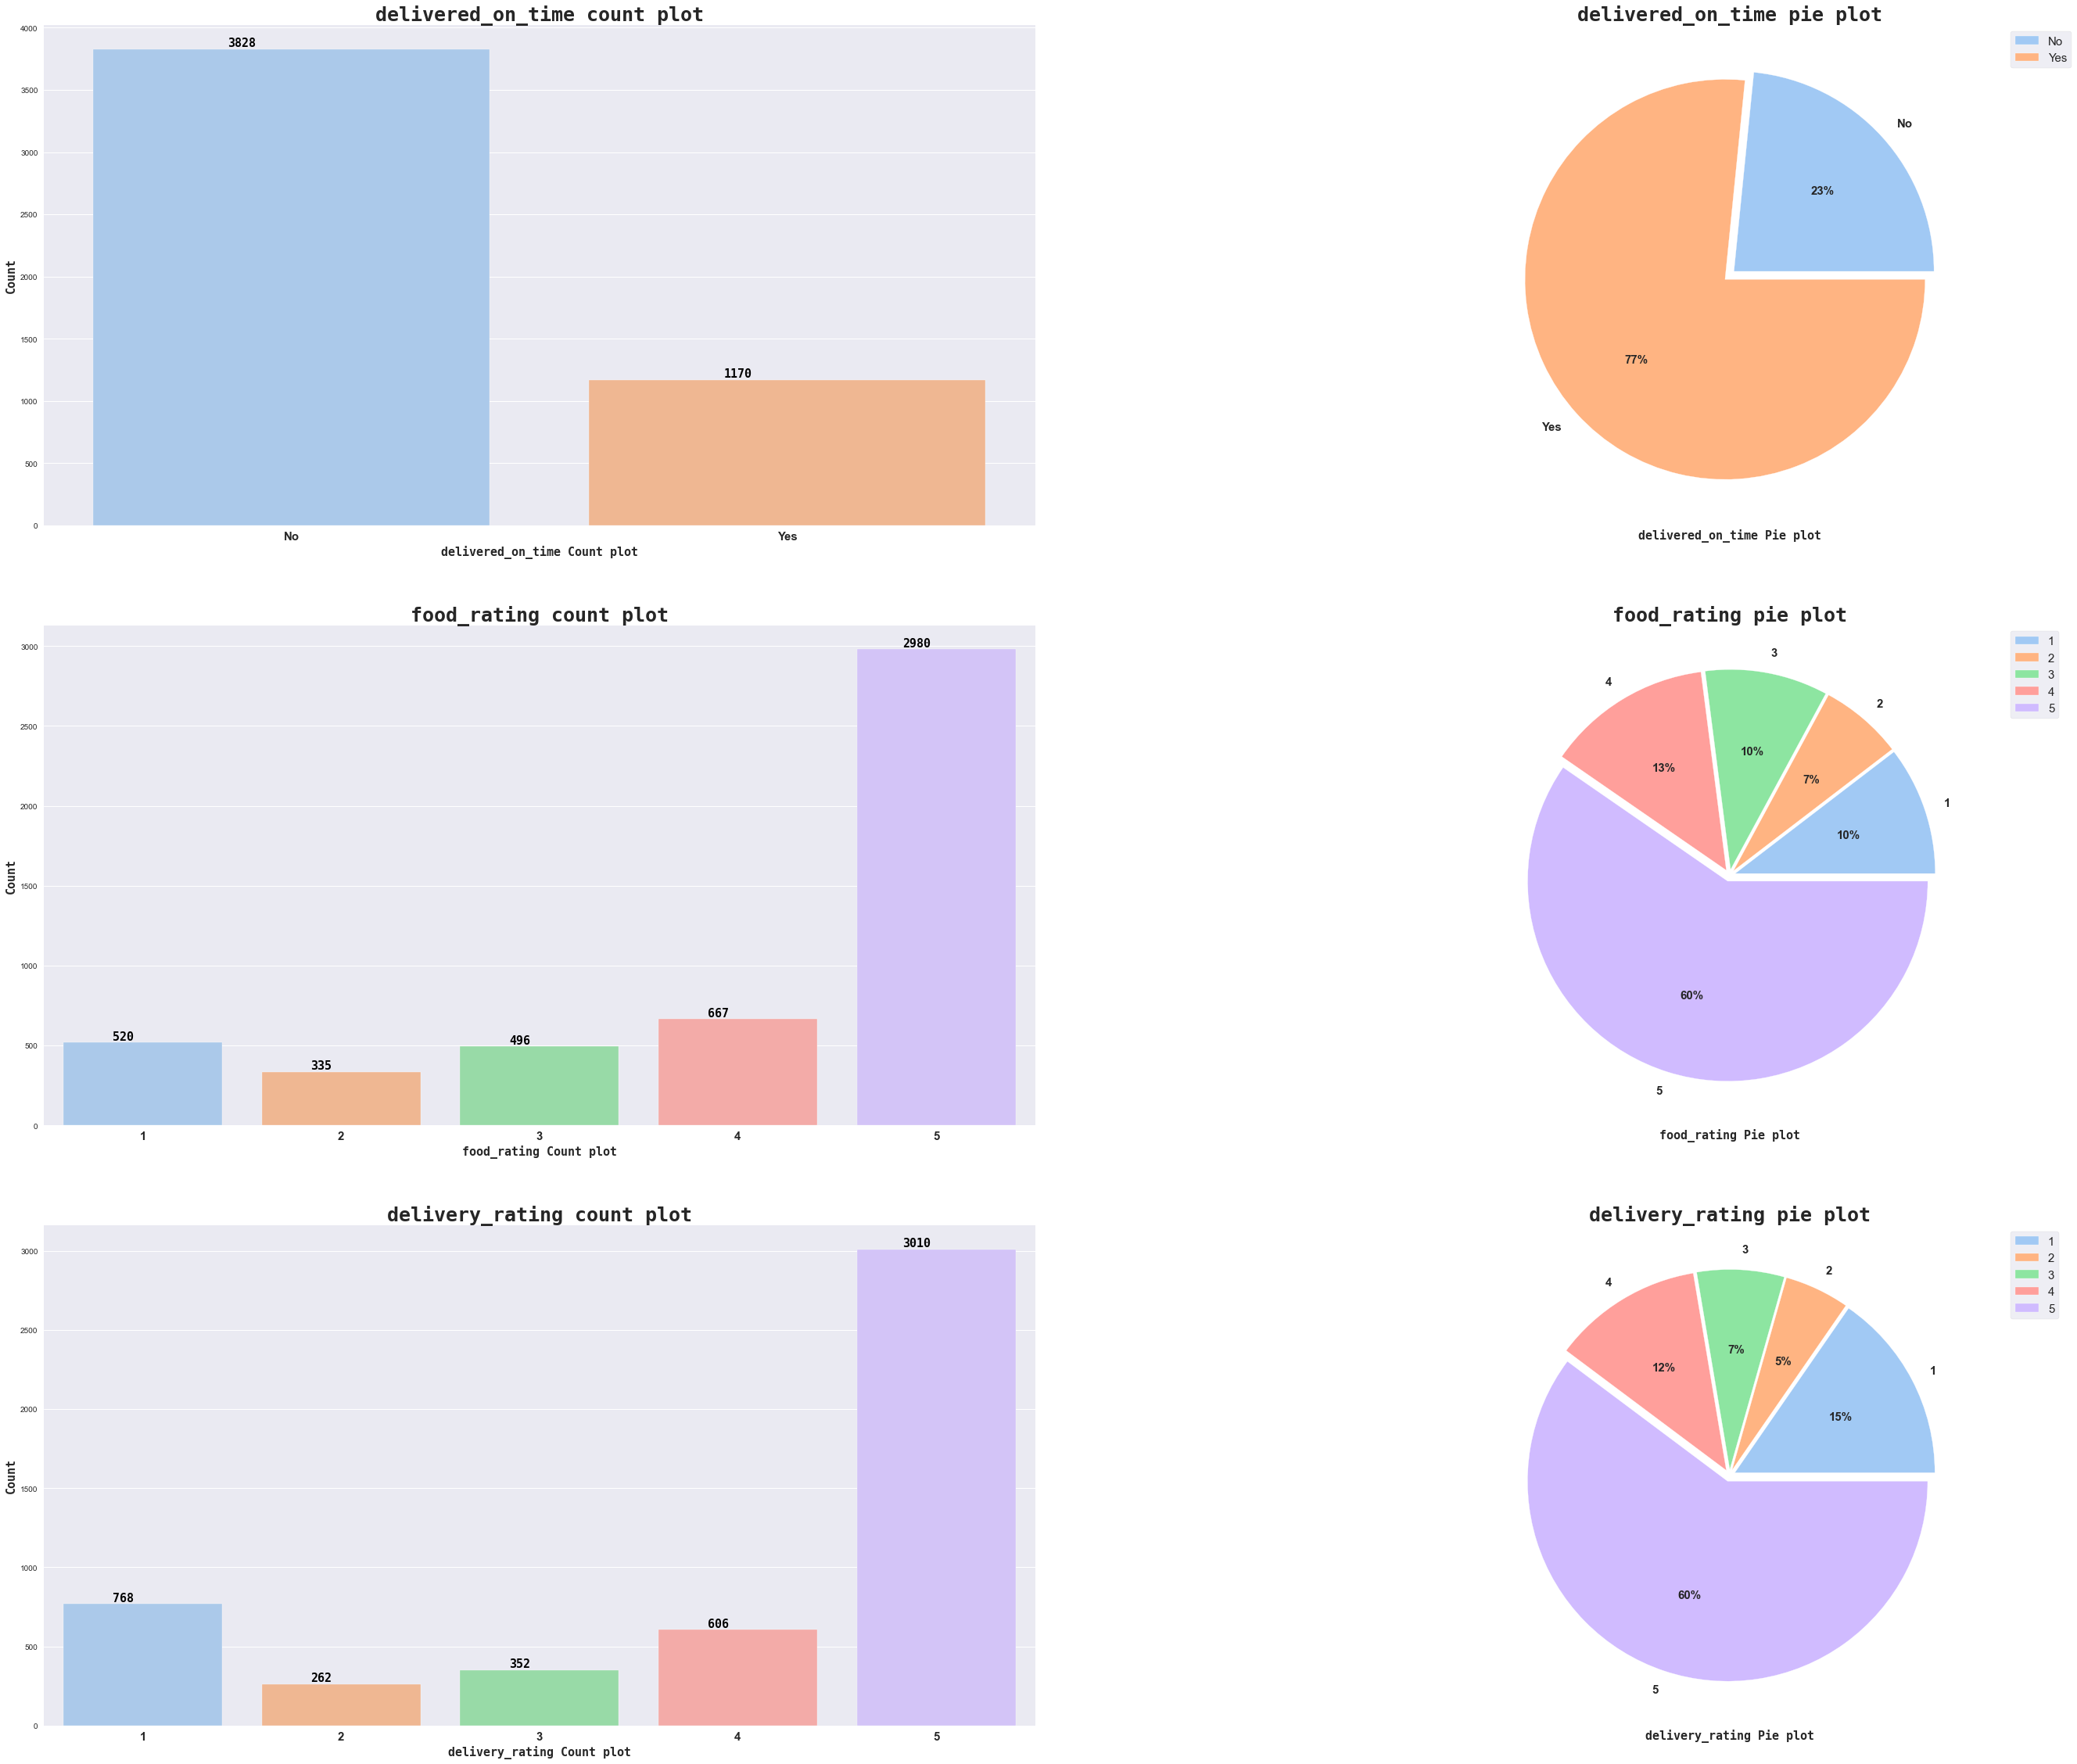

In [ ]:
cat_cols = ["delivered_on_time","food_rating", "delivery_rating"]
fig, ax = plt.subplots(3, 2, figsize = (50, 40))
for i, col in enumerate(cat_cols):
    count_pie(df, col, ax = (ax[i % 3, i//3], ax[i%3, i//3 + 1]))

- 77% of the orders are delivered on time and 23% of the orders are not delivered on time.
- 60% of the orders got the highest food rating of 5. %10 of the orders got 1 from the food ranking.
- 60% of the orders got the highest delivery rating of 5 and %15 of the orders got 1 from the delivery ranking.

**Numerical Variables**

In [ ]:
def plot_hist(auto_df, col, hue = None, ax = None):
    """
     This function Outputs the histogram for the column"
     
     Arguments \
     df: dataframe.
     col: the column to plot the histogram for.
     hue: (optional) to specify if there is a second variable.
     ax: (optional) to specify the axis to draw in.
    """
    plot = sns.histplot(data = df, x = col, kde= True, hue = hue, palette = "pastel", ax = ax)
        
    # titles
    plot.set_title(f"histogram plot for column {col}", fontsize = 15,weight = "bold", 
                fontname = "monospace", pad = 20)
    plot.set_xlabel(col, fontsize = 10,  weight = "semibold", fontname = "monospace")
    plot.set_ylabel("Count", fontsize = 10,  weight = "semibold", fontname = "monospace")

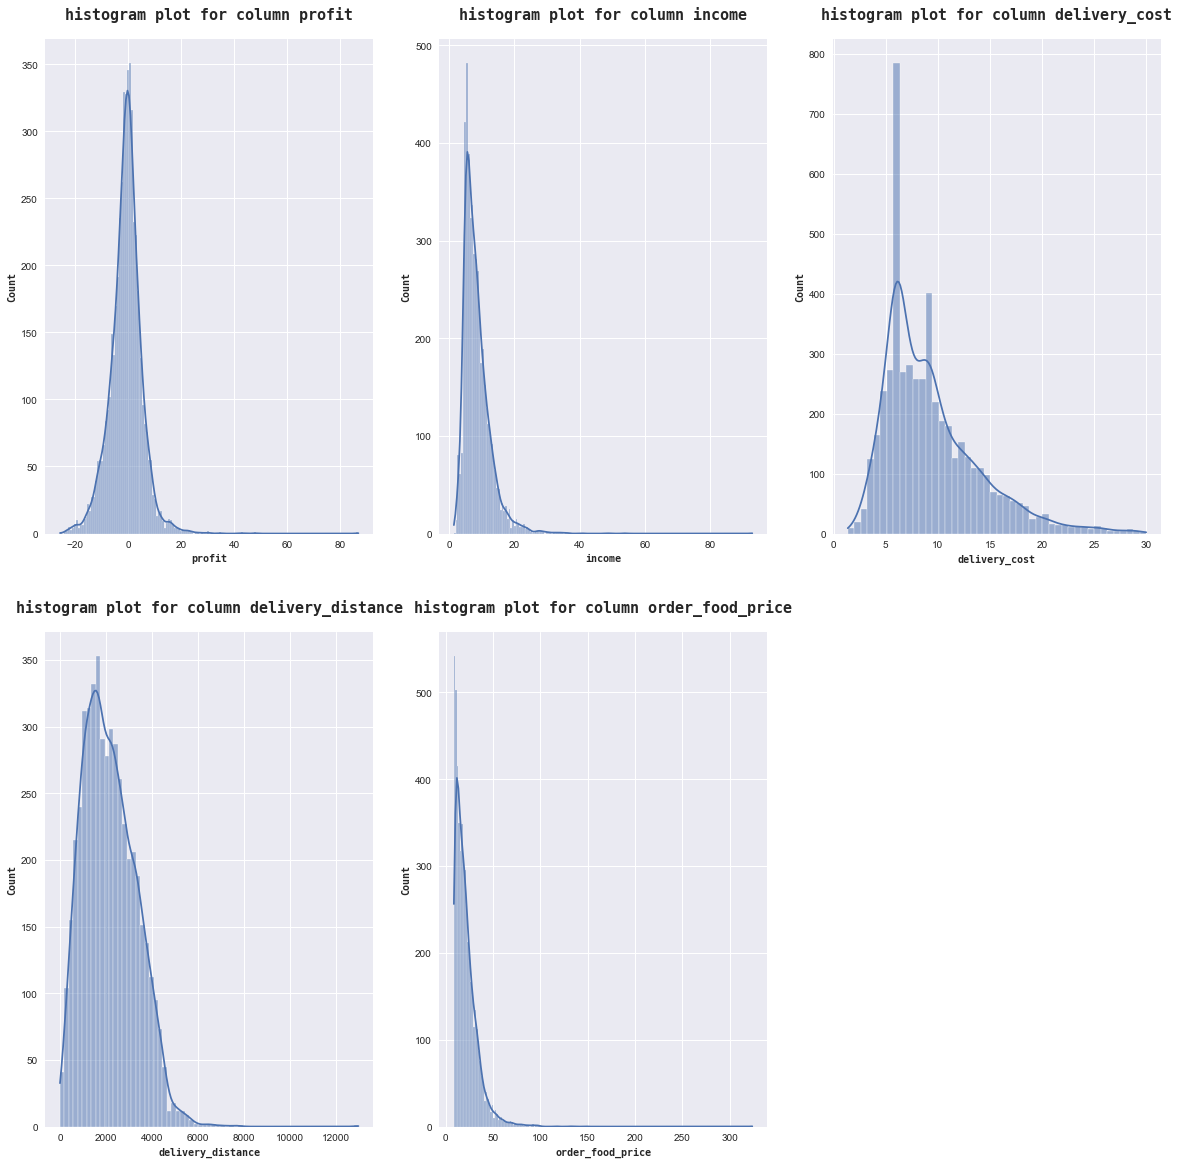

In [ ]:
num_cols = ["profit", "income", "delivery_cost","delivery_distance", "order_food_price", "delivery_fee"]
fig, ax = plt.subplots(2,3, figsize = (20, 20))
for i, col in enumerate(num_cols):
    plot_hist(df, col, ax = ax[i//3, i%3])
ax[1, 2].remove()

From the histograms above we can see that the distributions of the variable below resembles of the normal distribution. However there seems to be some with some. Therefore I will check the normality with the proper tests later.

- profit
- income
- delivery distance

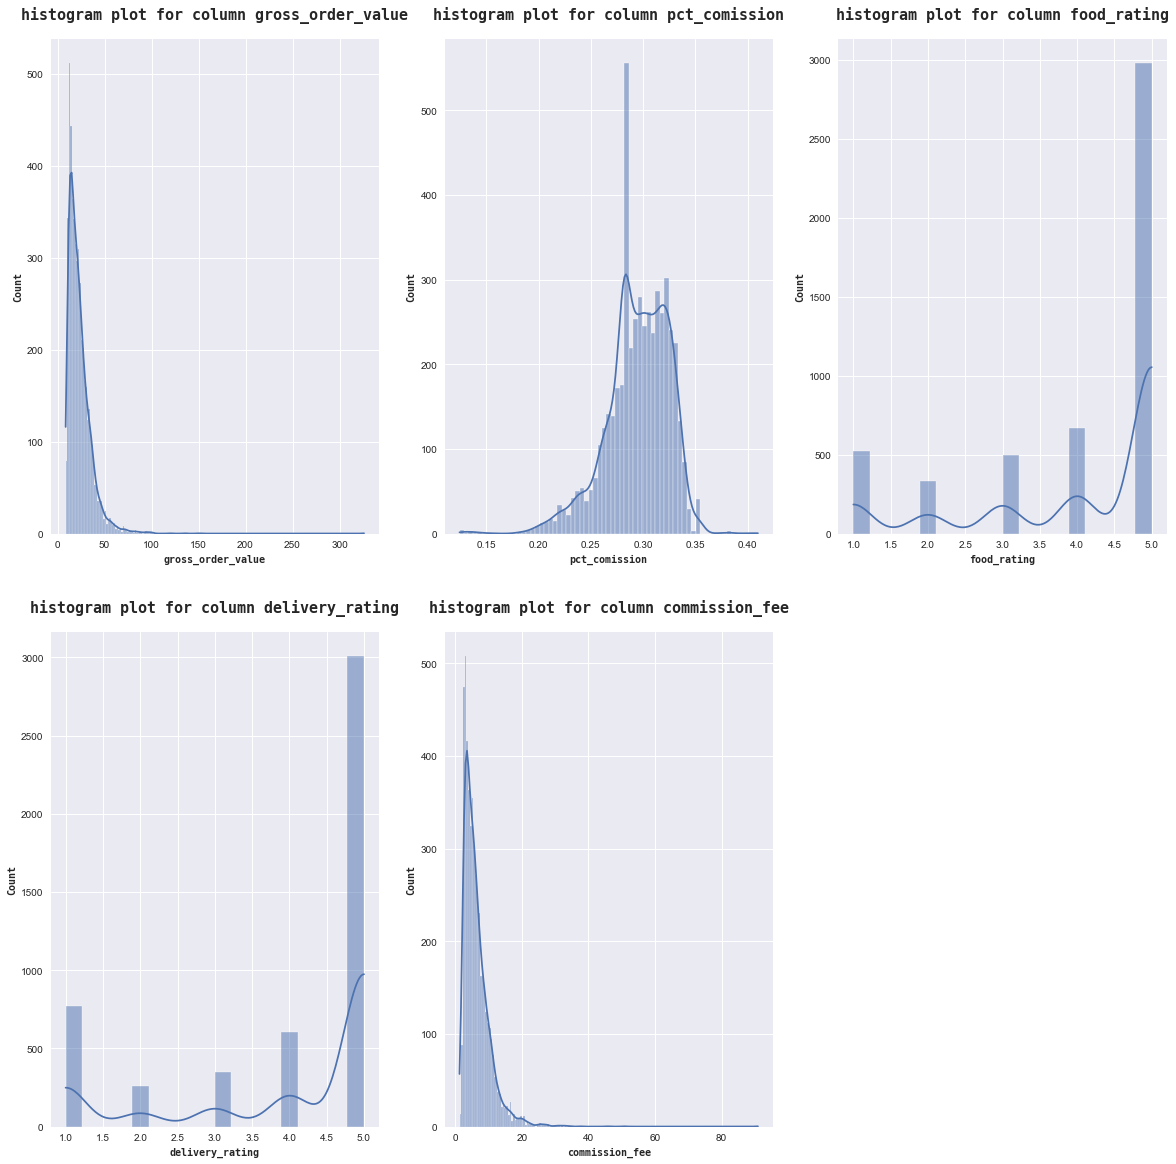

In [ ]:
num_cols = ["gross_order_value", "pct_comission", "food_rating", "delivery_rating","commission_fee"]
fig, ax = plt.subplots(2,3, figsize = (20, 20))
for i, col in enumerate(num_cols):
    plot_hist(df, col, ax = ax[i//3, i%3])
ax[1, 2].remove()

The variables above seems to be  not normally distributed except for gross_order_value and commission_fee. There are some outliers in these columns too.

**Numerical values with the new service**

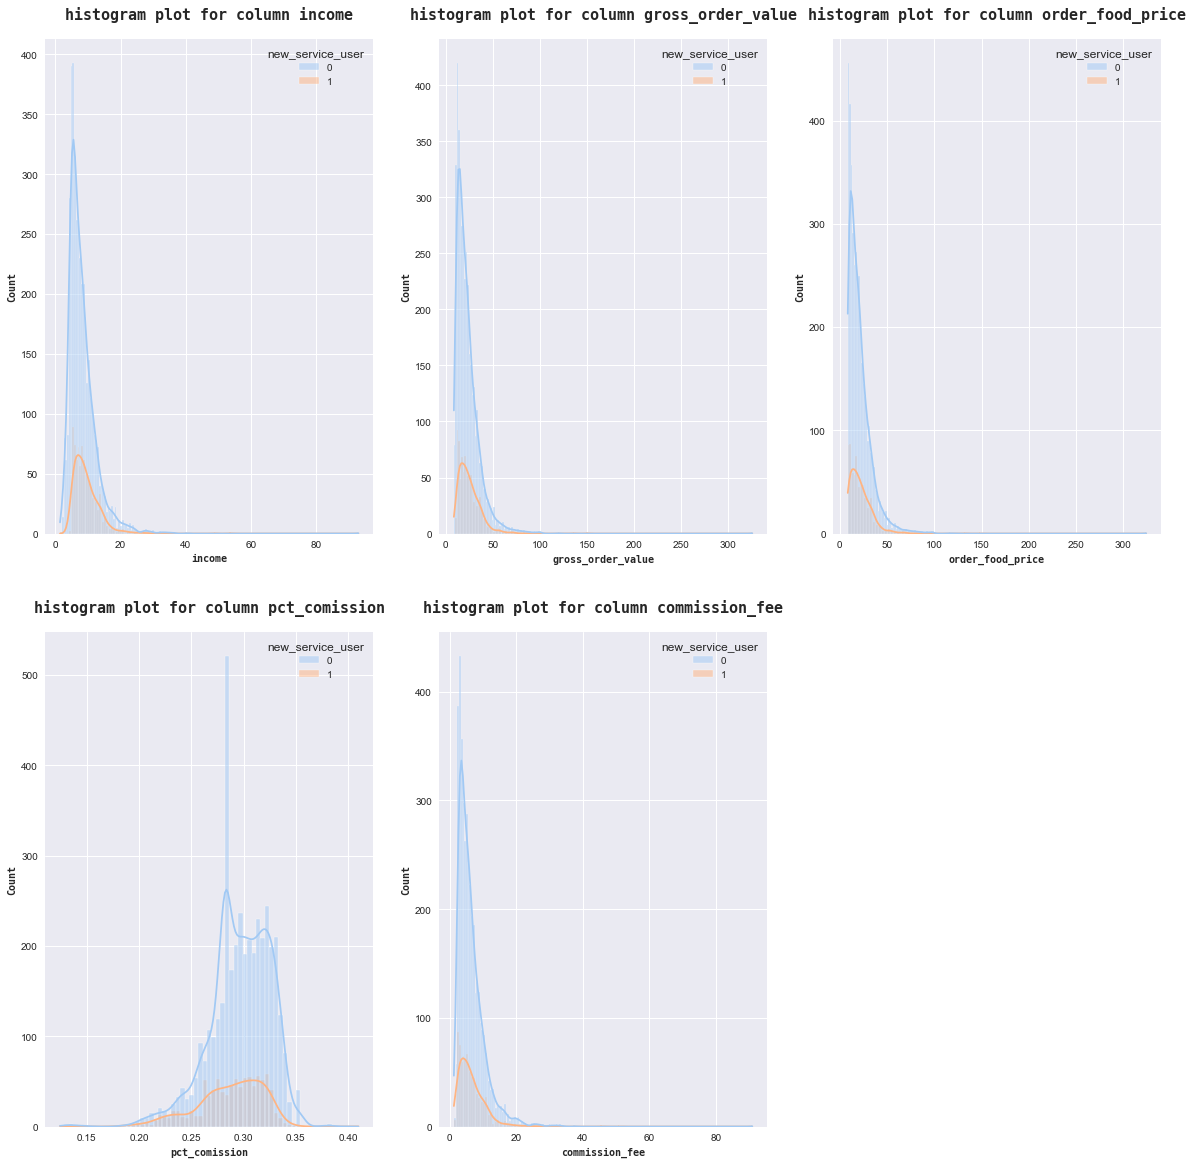

In [ ]:
num_cols = ["income","gross_order_value", "order_food_price", "pct_comission", "commission_fee"]
fig, ax = plt.subplots(2,3, figsize = (20, 20))
for i, col in enumerate(num_cols):
    plot_hist(df, col, ax = ax[i//3, i%3], hue = "new_service_user")
ax[1, 2].remove()

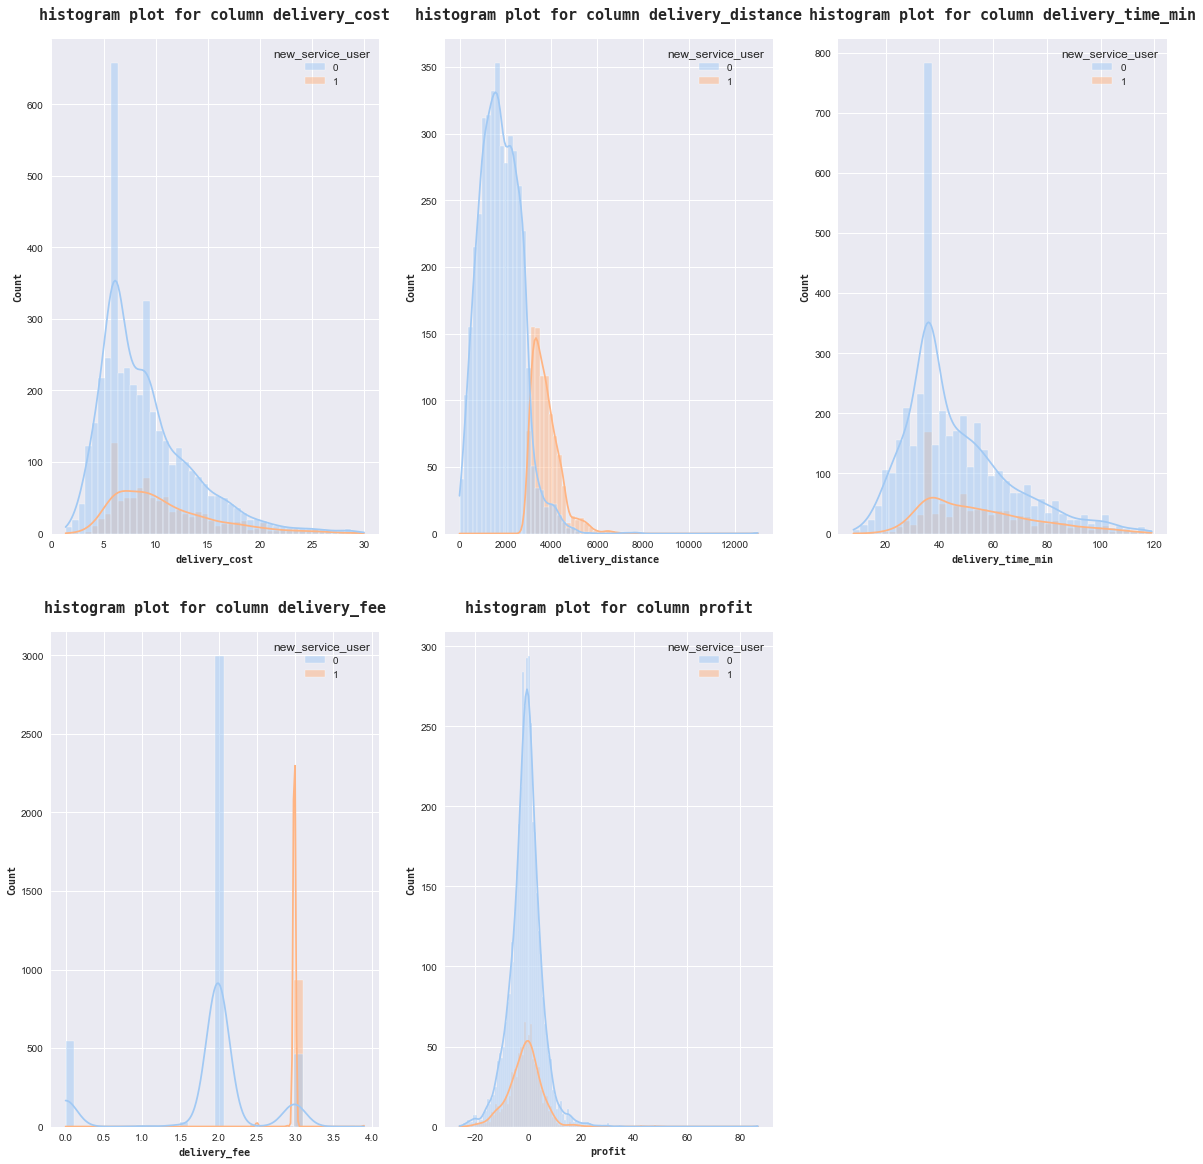

In [ ]:
num_cols = ["delivery_cost", "delivery_distance", "delivery_time_min", "delivery_fee","profit"]
fig, ax = plt.subplots(2,3, figsize = (20, 20))
for i, col in enumerate(num_cols):
    plot_hist(df, col, ax = ax[i//3, i%3], hue = "new_service_user")
ax[1, 2].remove()

From the graphs above we can see some difference for the orders with new service. In the later sections I will try to statistically show these differences. 

### 2.3.2 Outlier Detection <a class="anchor" id="outlier"></a>

In [ ]:
#Let's define numerical columns
num_cols1 = ["income","profit","commission_fee","gross_order_value","order_food_price", "pct_comission"]
num_df1 = df[num_cols1]

In [ ]:
#Let's define numerical columns
num_cols2 = ["delivery_cost", 'delivery_distance', 'delivery_time_min','delivery_fee']
num_df2 = df[num_cols2]

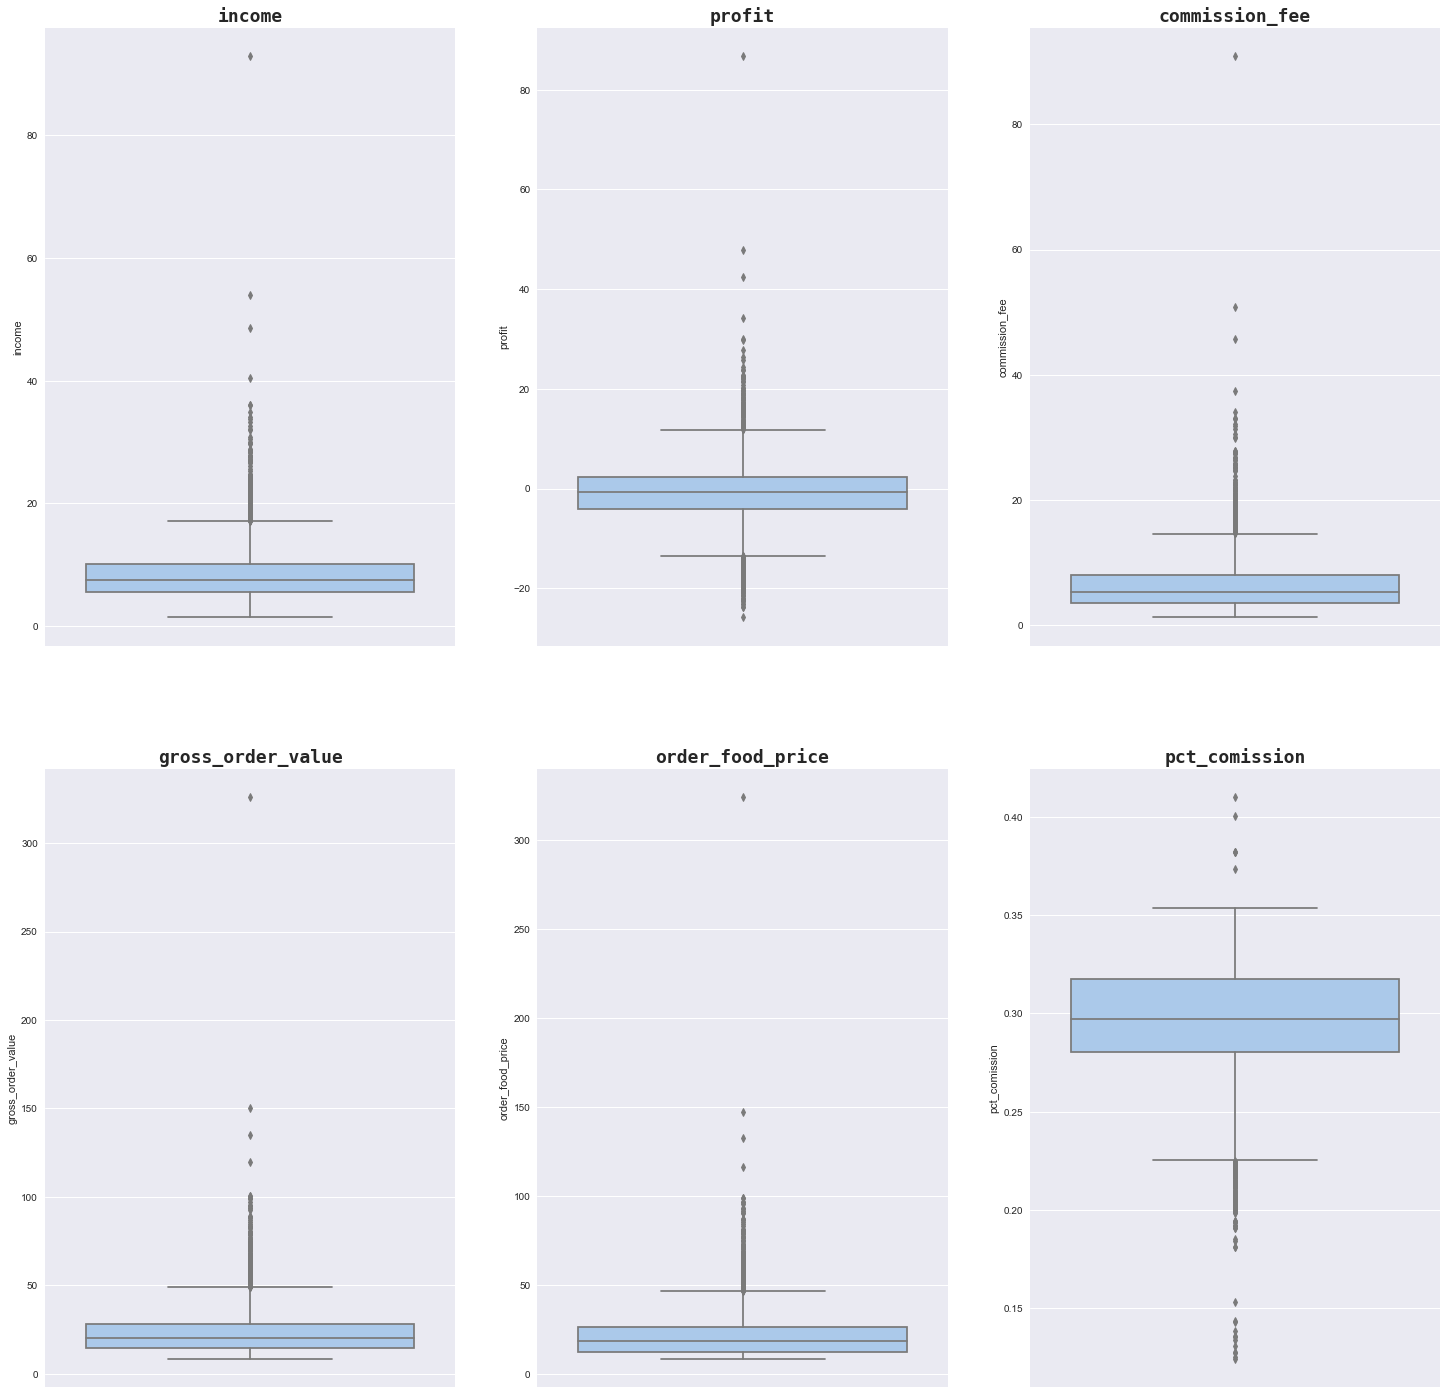

In [ ]:
# I will draw boxplots to investigate outliers

fig, ax = plt.subplots(2, 3, figsize = (25, 25))

for i, col in enumerate(num_df1.columns):
    g = sns.boxplot(data = df, y = col, ax = ax[i // 3, i % 3], palette = "pastel")
    g.set_title(col, weight = "bold", fontsize = 18, fontname = "monospace")

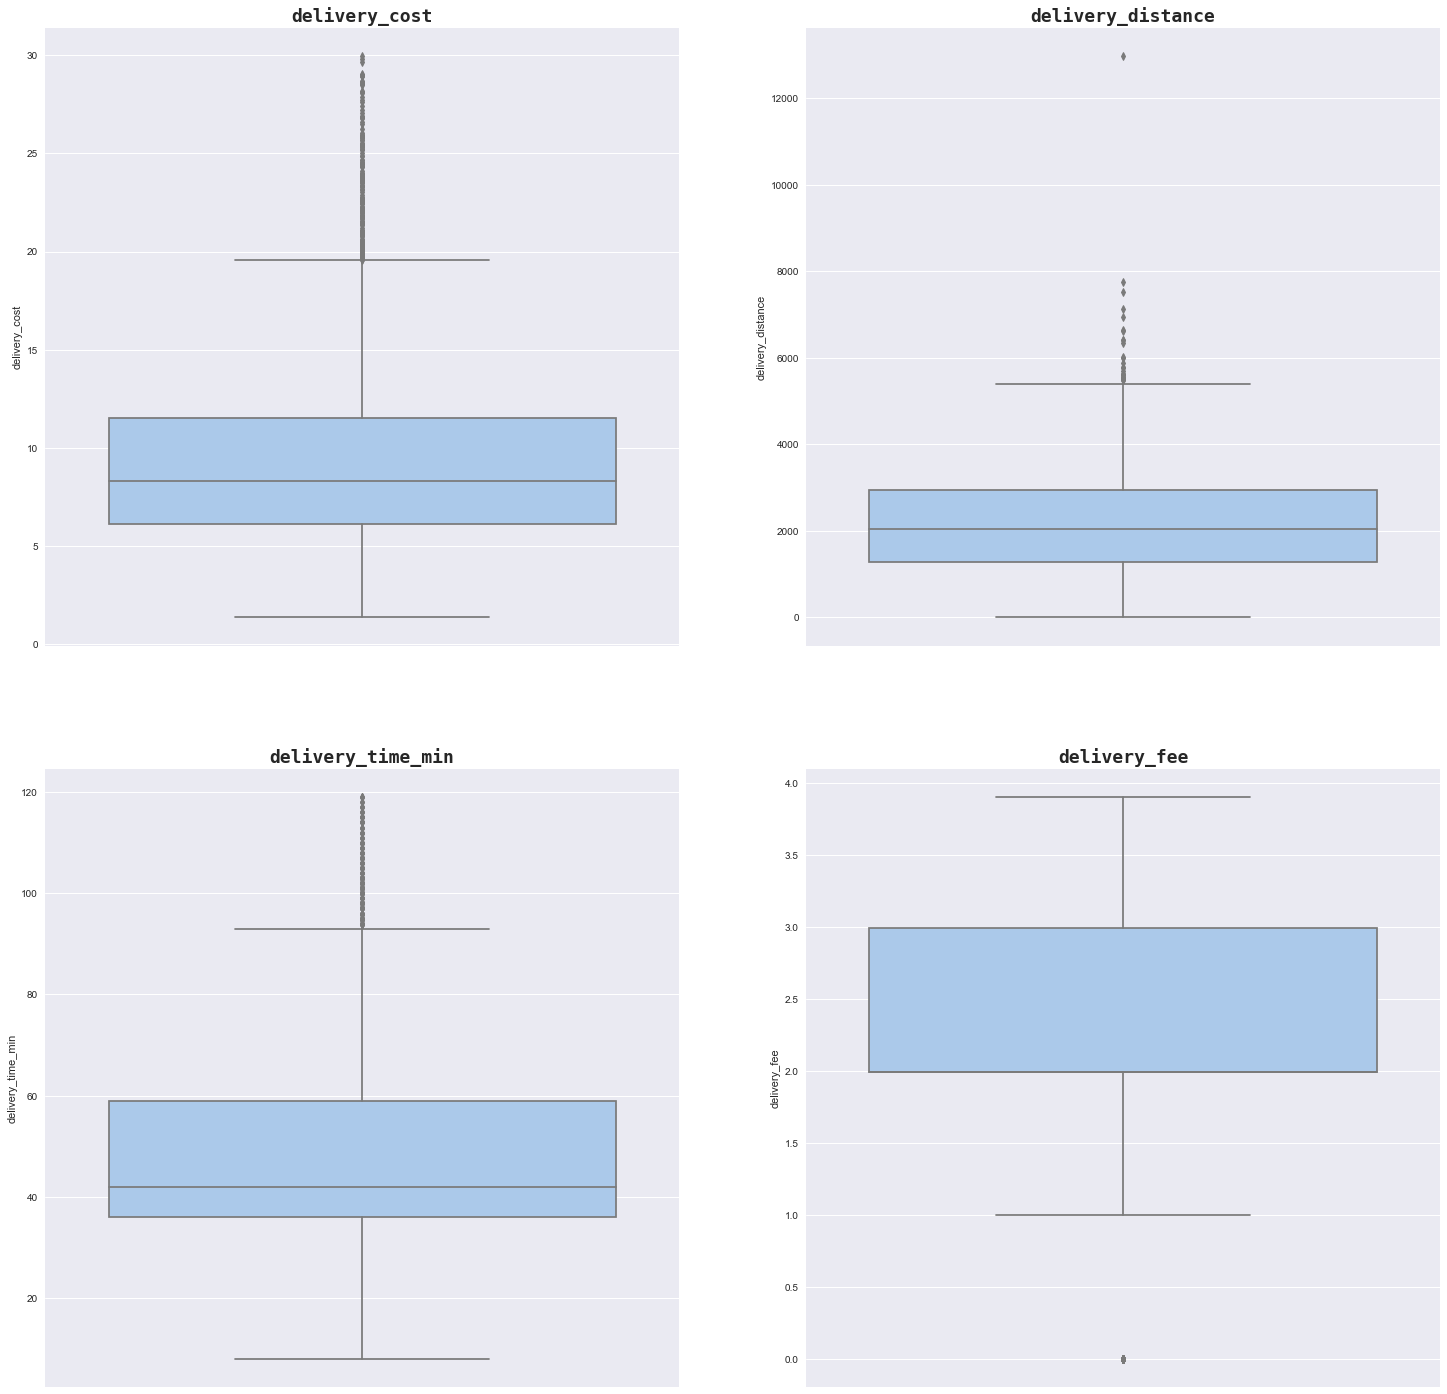

In [ ]:
# I will draw boxplots to investigate outliers

fig, ax = plt.subplots(2, 2, figsize = (25, 25))

for i, col in enumerate(num_df2.columns):
    g = sns.boxplot(data = df, y = col, ax = ax[i // 2, i % 2], palette = "pastel")
    g.set_title(col, weight = "bold", fontsize = 18, fontname = "monospace")

From the boxplots above we can see some outliers. However for now we will keep them.

In [ ]:
# let's see how many outliers are in every column
Q1 = num_df.quantile(0.25)
Q3 = num_df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
#condition
num_cols3 = ["income","profit","commission_fee","gross_order_value","order_food_price", "pct_comission","delivery_cost", 'delivery_distance', 'delivery_time_min','delivery_fee']
num_df = df[num_cols3]
filt = ((num_df < (lower_bound)) | (num_df > (upper_bound)))
filt.sum()

commission_fee           0
customer_n_th_order      0
delivery_cost          190
delivery_distance       27
delivery_fee           543
delivery_rating          0
delivery_time_min      200
food_rating              0
gross_order_value      189
income                   0
order_food_price       191
pct_comission          150
profit                   0
dtype: int64

In [ ]:
#Having a look at the outlier values, cannot see a significant outlier
df.loc[filt["income"]]

,city,order_date,customer_n_th_order,cuisine_type,device_type,order_uses_new_service,customer_segment,delivery_status,delivery_distance,delivery_time_min,delivered_on_time,order_food_price,delivery_fee,gross_order_value,pct_comission,delivery_cost,food_rating,delivery_rating,income,profit,commission_fee,new_service_user


In [ ]:
#Having a look at the outlier values, cannot see a significant outlier
df.loc[filt["delivery_cost"]]

,city,order_date,customer_n_th_order,cuisine_type,device_type,order_uses_new_service,customer_segment,delivery_status,delivery_distance,delivery_time_min,delivered_on_time,order_food_price,delivery_fee,gross_order_value,pct_comission,delivery_cost,food_rating,delivery_rating,income,profit,commission_fee,new_service_user
8,CityB,2021-12-12,2,Other,Website,No,non-adopter,Delivered,2664,90.0,Yes,12.3250,1.99,14.3150,0.303877,22.54,2,5,5.735285,-16.804715,3.745285,0
10,CityB,2022-01-16,4,Other,Website,Yes,adopter,Delivered,3709,87.0,Yes,12.6650,2.99,15.6550,0.285532,21.88,2,2,6.606260,-15.273740,3.616260,1
47,CityB,2022-01-15,1,Mediterranean,Mobile,No,non-adopter,Delivered,3261,78.0,Yes,9.8600,1.99,11.8500,0.293671,19.62,3,2,4.885595,-14.734405,2.895595,0
145,CityC,2022-02-06,1,Other,Mobile,No,non-adopter,Delivered,1474,97.0,Yes,8.9250,0.00,8.9250,0.323810,24.32,2,1,2.890000,-21.430000,2.890000,0
161,CityA,2022-01-01,1,Grill,Mobile,Yes,adopter,Delivered,4090,88.0,No,18.2750,2.99,21.2650,0.303315,22.24,4,1,8.533087,-13.706913,5.543087,1
166,CityA,2021-11-13,1,Other,Mobile,No,non-adopter,Delivered,1272,100.0,Yes,13.4470,1.99,15.4370,0.256527,25.19,4,2,5.439512,-19.750488,3.449512,0
203,CityA,2022-01-01,1,Oriental,Mobile,No,non-adopter,Delivered,1709,91.0,No,15.8100,1.99,17.8000,0.313483,22.88,1,4,6.946169,-15.933831,4.956169,0
214,CityA,2022-01-02,1,Mediterranean,Mobile,Yes,adopter,Delivered,3615,89.0,No,17.2550,2.99,20.2450,0.300815,22.26,3,1,8.180563,-14.079437,5.190563,1
269,CityA,2021-11-28,1,Other,Website,No,non-adopter,Delivered,3129,114.0,Yes,11.6705,1.99,13.6605,0.251089,28.62,3,1,4.920333,-23.699667,2.930333,0
282,CityB,2021-11-06,1,Oriental,Website,No,non-adopter,Delivered,4105,83.0,No,63.7500,1.99,65.7400,0.342257,20.84,4,5,23.808908,2.968908,21.818908,0


In [ ]:
#Having a look at the outlier values, cannot see a significant outlier
df.loc[filt["profit"]]

,city,order_date,customer_n_th_order,cuisine_type,device_type,order_uses_new_service,customer_segment,delivery_status,delivery_distance,delivery_time_min,delivered_on_time,order_food_price,delivery_fee,gross_order_value,pct_comission,delivery_cost,food_rating,delivery_rating,income,profit,commission_fee,new_service_user


### 2.3.2 Correlation Analysis <a class="anchor" id="correlation"></a>

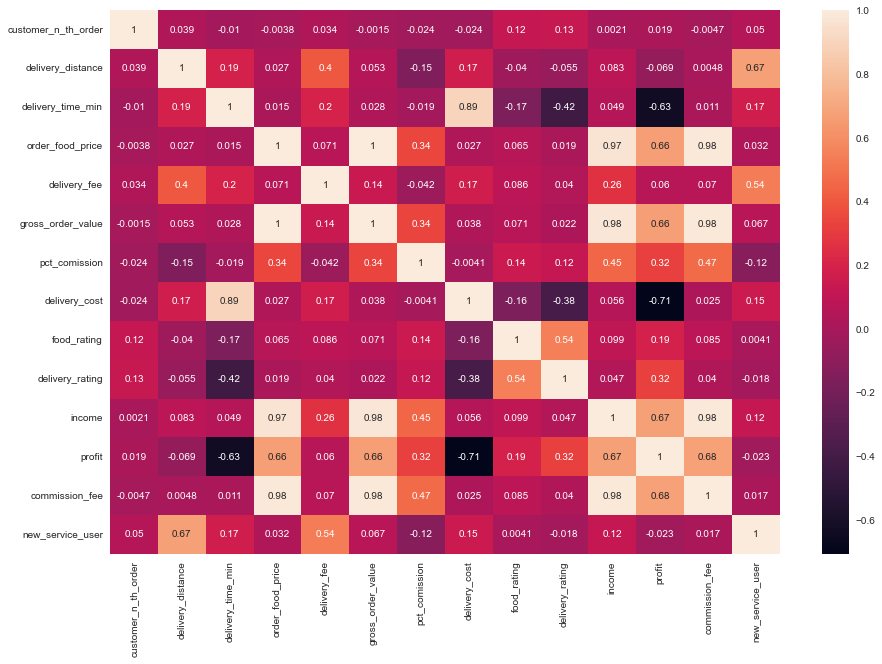

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True)

plt.show()

In [ ]:
num_cols = ['customer_n_th_order', 'delivery_distance', 'delivery_time_min',
       'order_food_price', 'delivery_fee', 'gross_order_value',
       'pct_comission', 'delivery_cost', 'food_rating', 'delivery_rating',
       'income', 'profit', 'commission_fee', 'new_service_user']
num_df = df[num_cols]

In [ ]:
X = num_df.drop(columns=['new_service_user'], axis=1)
y = df.new_service_user

correlation_list = []
for col in X.columns:
    correlation_list.append(pearsonr(X[col], y)[0])
    
correlations = {}
for i, j in zip(X.columns, correlation_list):
    correlations[i] = round(j, 2)
sorted_correlations = pd.DataFrame(sorted(correlations.items(), key=lambda x: x[1], reverse=True), columns=['variable', 'correlations'])
sorted_correlations['variable'] = sorted_correlations['variable'].astype('string')
sorted_correlations

,variable,correlations
0,delivery_distance,0.67
1,delivery_fee,0.54
2,delivery_time_min,0.17
3,delivery_cost,0.15
4,income,0.12
5,gross_order_value,0.07
6,customer_n_th_order,0.05
7,order_food_price,0.03
8,commission_fee,0.02
9,food_rating,0.00


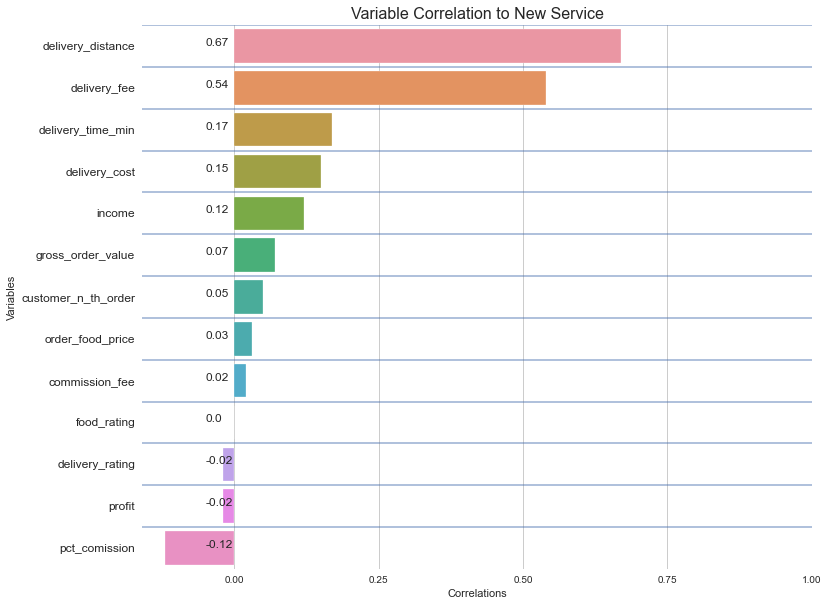

In [ ]:
#Plot the feature correlation to price
plt.figure(figsize=(12, 10))
sns.set_style('whitegrid')
sns.barplot(sorted_correlations['correlations'], sorted_correlations['variable'])
plt.title('Variable Correlation to New Service', fontsize=16)
plt.xlabel('Correlations')
plt.ylabel('Variables')
plt.yticks(fontsize=12)
plt.xticks(np.linspace(0, 1, 5))
for ind, val in enumerate(sorted_correlations['correlations']):
    plt.text(x= -0.05, y= ind, s= val, fontsize=12)
    plt.axhline(ind - .5, alpha=0.5)
plt.show()

- From the correlation analysis we can tell that delivery distance and the new service is very much correlated.

- Also delivery fee and delivery time (in minutes) seem to increase with the adoption of the new service.

- Moreover income also seems to increase with the adoption of the new service but correlation does seem to be very strong.

- I will check these observations later with hypothesis testing.

## 3. Benefit Analysis of the New Service  <a class="anchor" id="benefit"></a>

In this section I will try to detect if there is any benefit of the new service. To this end, I will investigate if the new service has any effect on

- income
- gross_order_value (food price+delivery)
- order_food_price
- pct_comission
- commission_fee 
- food_rating
- delivery_rating

From the table below we can see that on average the new service is associated with higher income, gross_order_value, order_food_price and lower pct_commission, food_rating, delivery_rating. I will conduct several hypotheses testing to determine if these associations are statistically significant. 

In [ ]:
df.groupby(['new_service_user'])['income','gross_order_value','order_food_price', 'pct_comission', 'commission_fee' ,'food_rating','delivery_rating'].mean()

,income,gross_order_value,order_food_price,pct_comission,commission_fee,food_rating,delivery_rating
new_service_user,,,,,,,
0,8.184699,22.864747,21.032840,0.296282,6.352792,4.048113,3.979028
1,9.522784,25.089983,22.102914,0.286920,6.535715,4.062434,3.910053


### 3.1 New Service's Effect on Income <a class="anchor" id="benefit-new-service"></a>

From the violin plot below we can see that the average income generated from the orders using new service and orders not using the new service is nearly the same. I will if there is any difference between orders with or without the new service in terms of income.

**Visualization**

In [ ]:
def violin(auto_df, y, x = None, hue = None, ax = None):
    """
    This function allows you to plot the violin plot of a continuous variable.
    ---
    arguments \
    df: dataframe name.
    col: column name.
    hue: to add another variable.
    ax: to specify axis to draw in.
    """
    g = sns.violinplot(data = auto_df, x = x, y = y, hue = hue, palette = "pastel", ax = ax)
    
    # titles
    g.set_title(f"{y} violin plot with {x}", fontsize = 17, weight = "bold", fontname = "monospace", pad = 20)
    g.set_xlabel(x, fontsize = 15, weight = "semibold", fontname = "monospace")
    g.set_ylabel(y, fontsize = 15, weight = "semibold", fontname = "monospace")

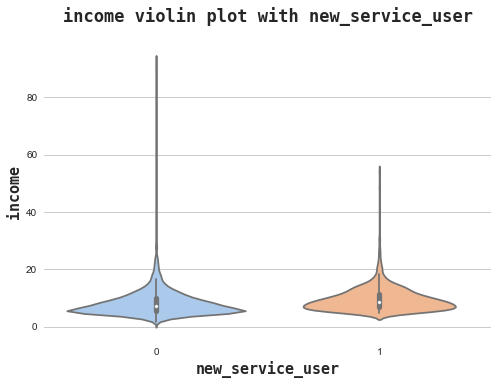

In [ ]:
violin(df, y = "income", x= "new_service_user")

From the violin graph we can see that orders with the new service has a higher average income. Let's confirm this with hypothesis testing.

**Hypothesis Testing**

I will determine below if I can use a parametric hypothesis or not for which we need normality and homogeneity of the variances.

**Normality Check with Shapiro Test**

$H_{0}$: The data is normally distributed.  
$H_{1}$: The data is not normally distributed.

In [ ]:
#Defining function for normality check with Levene Test
def check_normality(data):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    print("p value:%.4f" % p_value_normality)
    if p_value_normality <0.05:
        print("Reject null hypothesis >> The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis >> The data is normally distributed") 

In [ ]:
#Dividing Groups
group1 = df[df['new_service_user']==1]['income']
group2 = df[df['new_service_user']==0]['income']

In [ ]:
check_normality(group1)
check_normality(group2)

p value:0.0000
Reject null hypothesis >> The data is not normally distributed
p value:0.0000
Reject null hypothesis >> The data is not normally distributed


**Homogeneity of Variances with Levene Test**

**Levene Test:**

-   $H_0$: The two samples come from a population having equal variance

-   $H_1$: The two samples come from a population having different variance

In [ ]:
def check_variance_homogeneity(group1, group2):
    test_stat_var, p_value_var= stats.levene(group1,group2)
    print("p value:%.4f" % p_value_var)
    if p_value_var <0.05:
        print("Reject null hypothesis >> The variances of the samples are different.")
    else:
        print("Fail to reject null hypothesis >> The variances of the samples are same.")

In [ ]:
#Applying Levene Test
check_variance_homogeneity(group1, group2)

p value:0.7000
Fail to reject null hypothesis >> The variances of the samples are same.


Since the normality assumption of the parametric test is violated I need to use a non-parametric test. Since we have unpaired data with two groups I use Mann-Whitney U test.

State the hypotheses:

- $H_0: η\_1 = η\_2$ (there is no difference in the median income levels of the orders using different service)
- $H_1: η\_1 ≠ η\_2$ (there is a difference in the median income levels of the orders using different service)

In [ ]:
# Conducting Mann-Whitney U Test 
ttest,pvalue = stats.mannwhitneyu(group1,group2, alternative="two-sided")
print("p-value:%.4f" % pvalue)
if pvalue <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p-value:0.0000
Reject null hypothesis


**At 0.05 significance level we can claim that new service has a significant effect on income from the average income values we already know that orders with new service generate more income for the firm.**

### 3.2 New Service's Effect on gross_order_value <a class="anchor" id="benefit-gross-order"></a>

**Visualization**

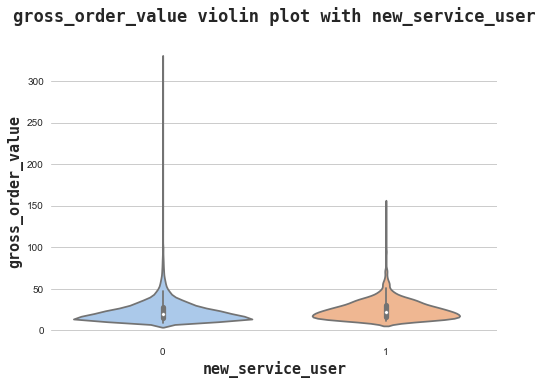

In [ ]:
violin(df, y = "gross_order_value", x= "new_service_user")

From the violin graph we can see that orders with the new service has a higher gross order value. Let's confirm this with hypothesis testing.

**Hypothesis Testing**

I will determine below if I can use a parametric hypothesis or not for which we need normality and homogeneity of the variances.

**Normality Check with Shapiro Test**

$H_{0}$: The data is normally distributed.  
$H_{1}$: The data is not normally distributed.

In [ ]:
#Dividing Groups
group1 = df[df['new_service_user']==1]['gross_order_value']
group2 = df[df['new_service_user']==0]['gross_order_value']

In [ ]:
check_normality(group1)
check_normality(group2)

p value:0.0000
Reject null hypothesis >> The data is not normally distributed
p value:0.0000
Reject null hypothesis >> The data is not normally distributed


**Homogeneity of Variances with Levene Test**

**Levene Test:**

-   $H_0$: The two samples come from a population having equal variance

-   $H_1$: The two samples come from a population having different variance

In [ ]:
#Applying Levene Test
check_variance_homogeneity(group1, group2)

p value:0.9319
Fail to reject null hypothesis >> The variances of the samples are same.


Since the normality assumption of the parametric test is violated I need to use a non-parametric test. Since we have unpaired data with two groups I use Mann-Whitney U test.

State the hypotheses:

- $H_0: η\_1 = η\_2$ (there is no difference in the median gross_order_value of the orders using different services)
- $H_1: η\_1 ≠ η\_2$ (there is a difference in the median gross_order_value of the orders using different services)

In [ ]:
# Conducting Mann-Whitney U Test 
ttest,pvalue = stats.mannwhitneyu(group1,group2, alternative="two-sided")
print("p-value:%.4f" % pvalue)
if pvalue <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p-value:0.0000
Reject null hypothesis


**At 0.05 significance level we can claim that new service has a significant effect on gross_order value from the average values we already know that orders with new service generate more gross_order_value for the firm.**

### 3.3 New Service's Effect on order_food_price  <a class="anchor" id="benefit-food-price"></a>

**Visualization**

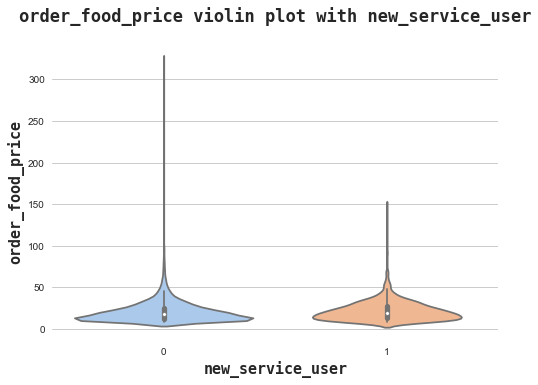

In [ ]:
violin(df, y = "order_food_price", x= "new_service_user")

From the violin graph we can see that orders with the new service has a higher order food price. Let's confirm this with hypothesis testing.

**Hypothesis Testing**

I will determine below if I can use a parametric hypothesis or not for which we need normality and homogeneity of the variances.

**Normality Check with Shapiro Test**

$H_{0}$: The data is normally distributed.  
$H_{1}$: The data is not normally distributed.

In [ ]:
#Dividing Groups
group1 = df[df['new_service_user']==1]['order_food_price']
group2 = df[df['new_service_user']==0]['order_food_price']

In [ ]:
check_normality(group1)
check_normality(group2)

p value:0.0000
Reject null hypothesis >> The data is not normally distributed
p value:0.0000
Reject null hypothesis >> The data is not normally distributed


**Homogeneity of Variances with Levene Test**

**Levene Test:**

-   $H_0$: The two samples come from a population having equal variance

-   $H_1$: The two samples come from a population having different variance

In [ ]:
#Applying Levene Test
check_variance_homogeneity(group1, group2)

p value:0.7837
Fail to reject null hypothesis >> The variances of the samples are same.


Since the normality assumption of the parametric test is violated I need to use a non-parametric test. Since we have unpaired data with two groups I use Mann-Whitney U test.

State the hypotheses:

- $H_0: η\_1 = η\_2$ (there is no difference in the median order_food_price of the orders using different services)
- $H_1: η\_1 ≠ η\_2$ (there is a difference in the median order_food_price of the orders using different services)

In [ ]:
# Conducting Mann-Whitney U Test 
ttest,pvalue = stats.mannwhitneyu(group1,group2, alternative="two-sided")
print("p-value:%.4f" % pvalue)
if pvalue <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p-value:0.0001
Reject null hypothesis


**At 0.05 significance level we can claim that new service has a significant effect on order food price from the average values we already know that orders with new service generate more order food price for the firm.**

### 3.4 New Service's Effect on pct_comission  <a class="anchor" id="benefit-pct-comm"></a>

**Visualization**

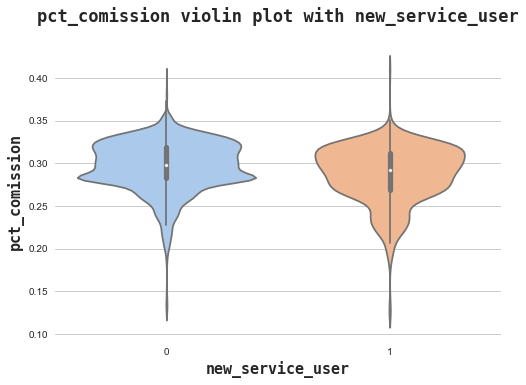

In [ ]:
violin(df, y = "pct_comission", x= "new_service_user")

From the violin graph we can see that orders with the new service has a lower average commission percentage. Let's confirm this with hypothesis testing.

**Hypothesis Testing**

I will determine below if I can use a parametric hypothesis or not for which we need normality and homogeneity of the variances.

**Normality Check with Shapiro Test**

$H_{0}$: The data is normally distributed.  
$H_{1}$: The data is not normally distributed.

In [ ]:
#Dividing Groups
group1 = df[df['new_service_user']==1]['pct_comission']
group2 = df[df['new_service_user']==0]['pct_comission']

In [ ]:
check_normality(group1)
check_normality(group2)

p value:0.0000
Reject null hypothesis >> The data is not normally distributed
p value:0.0000
Reject null hypothesis >> The data is not normally distributed


**Homogeneity of Variances with Levene Test**

**Levene Test:**

-   $H_0$: The two samples come from a population having equal variance

-   $H_1$: The two samples come from a population having different variance

In [ ]:
#Applying Levene Test
check_variance_homogeneity(group1, group2)

p value:0.0004
Reject null hypothesis >> The variances of the samples are different.


Since both the normality and homogeneity of variances assumptions of the parametric test are violated I need to use a non-parametric test. Since we have unpaired data with two groups I use Mann-Whitney U test.

State the hypotheses:

- $H_0: η\_1 = η\_2$ (there is no difference in the median pct_comission of the orders using different services)
- $H_1: η\_1 ≠ η\_2$ (there is a difference in the median pct_comission of the orders using different services)

In [ ]:
# Conducting Mann-Whitney U Test 
ttest,pvalue = stats.mannwhitneyu(group1,group2, alternative="two-sided")
print("p-value:%.4f" % pvalue)
if pvalue <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p-value:0.0000
Reject null hypothesis


**At 0.05 significance level we can claim that new service has a significant effect on commission level from the average values we already know that orders with new service generate less commission for the firm.**

### 3.5 New Service's Effect on commission fee  <a class="anchor" id="benefit-comm-fee"></a>

**Visualization**

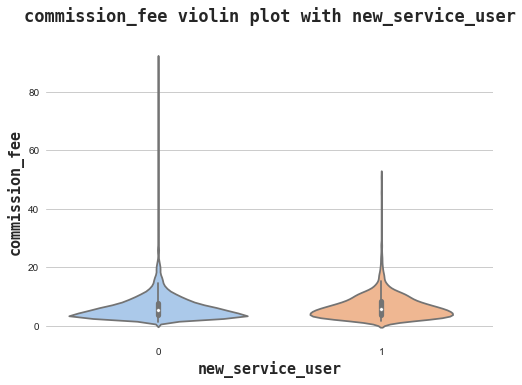

In [ ]:
violin(df, y = "commission_fee", x= "new_service_user")

There seems barely any difference. Let's confirm this with hypothesis testing.

**Hypothesis Testing**

I will determine below if I can use a parametric hypothesis or not for which we need normality and homogeneity of the variances.

**Normality Check with Shapiro Test**

$H_{0}$: The data is normally distributed.  
$H_{1}$: The data is not normally distributed.

In [ ]:
#Dividing Groups
group1 = df[df['new_service_user']==1]['commission_fee']
group2 = df[df['new_service_user']==0]['commission_fee']

In [ ]:
check_normality(group1)
check_normality(group2)

p value:0.0000
Reject null hypothesis >> The data is not normally distributed
p value:0.0000
Reject null hypothesis >> The data is not normally distributed


**Homogeneity of Variances with Levene Test**

**Levene Test:**

-   $H_0$: The two samples come from a population having equal variance

-   $H_1$: The two samples come from a population having different variance

In [ ]:
#Applying Levene Test
check_variance_homogeneity(group1, group2)

p value:0.4941
Fail to reject null hypothesis >> The variances of the samples are same.


Since the normality assumption of the parametric test is violated I need to use a non-parametric test. Since we have unpaired data with two groups I use Mann-Whitney U test.

State the hypotheses:

- $H_0: η\_1 = η\_2$ (there is no difference in the median commission_fee of the orders using different services)
- $H_1: η\_1 ≠ η\_2$ (there is a difference in the median commission_fee of the orders using different services)

In [ ]:
# Conducting Mann-Whitney U Test 
ttest,pvalue = stats.mannwhitneyu(group1,group2, alternative="two-sided")
print("p-value:%.4f" % pvalue)
if pvalue <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p-value:0.0751
Fail to reject null hypothesis


**At 0.05 significance level we cannot claim that new service has a significant effect on commission fee.**

### 3.6 New Service's Effect on food_rating  <a class="anchor" id="benefit-food-rating"></a>

**Visualization**

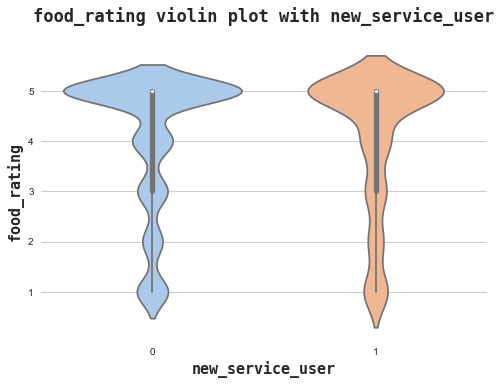

In [ ]:
violin(df, y = "food_rating", x= "new_service_user")

From the violin graph we can see that orders with the new service has very similar food rating average. Let's confirm this with hypothesis testing.

**Hypothesis Testing**

This time we have a categorical variable therefore we will use Chi-Square Independence Test.

State the hypotheses:

-   $H_0:$ There is no relation between the new service and rating of the food.
-   $H_1:$ There is a relation between the new service and rating of the food.

In [ ]:
Contingency_Table = pd.crosstab(df['new_service_user'],df['food_rating'], margins = True)
Contingency_Table

food_rating,1,2,3,4,5,All
new_service_user,,,,,,
0,420,272,408,546,2407,4053
1,100,63,88,121,573,945
All,520,335,496,667,2980,4998


In [ ]:
#Conducting Chi Square Test
stats.chi2_contingency(Contingency_Table, correction = True)

(0.932682941389197,
 0.9998751104796548,
 10,
 array([[ 421.68067227,  271.65966387,  402.21848739,  540.88655462,
         2416.55462185, 4053.        ],
        [  98.31932773,   63.34033613,   93.78151261,  126.11344538,
          563.44537815,  945.        ],
        [ 520.        ,  335.        ,  496.        ,  667.        ,
         2980.        , 4998.        ]]))

**Conclusion:** Since the p-value is greater than 0.05, we fail to reject the null hypothesis at 0.05 significance level. As there is no sufficient evidence that the new service play a role in food rating.

### 3.7 New Service's Effect on delivery_rating <a class="anchor" id="delivery-rating"></a>

**Visualization**

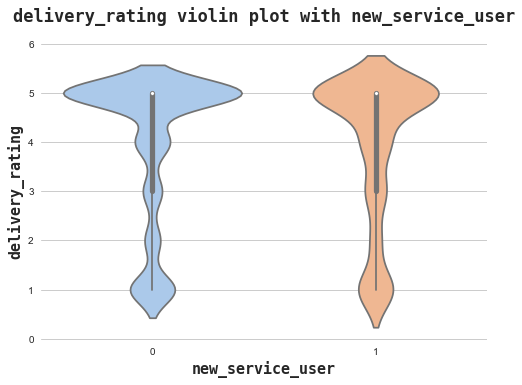

In [ ]:
violin(df, y = "delivery_rating", x= "new_service_user")

From the violin graph we can see that orders with the new service has higher delivery rating average. Let's see if we can confirm this with hypothesis testing.

**Hypothesis Testing**

Again we have a categorical variable therefore we will use Chi-Square Independence Test.

State the hypotheses:

-   $H_0:$ There is no relation between the new service and rating of the delivery.
-   $H_1:$ There is a relation between the new service and rating of the delivery.

In [ ]:
Contingency_Table = pd.crosstab(df['new_service_user'],df['delivery_rating'], margins = True)
Contingency_Table

delivery_rating,1,2,3,4,5,All
new_service_user,,,,,,
0,620,216,264,482,2471,4053
1,148,46,88,124,539,945
All,768,262,352,606,3010,4998


In [ ]:
#Conducting Chi Square Test
stats.chi2_contingency(Contingency_Table, correction = True)

(11.819522708745408,
 0.2973167981311001,
 10,
 array([[ 622.78991597,  212.46218487,  285.44537815,  491.42016807,
         2440.88235294, 4053.        ],
        [ 145.21008403,   49.53781513,   66.55462185,  114.57983193,
          569.11764706,  945.        ],
        [ 768.        ,  262.        ,  352.        ,  606.        ,
         3010.        , 4998.        ]]))

**Conclusion:** Since the p-value is greater than 0.05, we fail to reject the null hypothesis at 0.05 significance level. As there is no sufficient evidence that the new service plays a role in delivery rating.

All in all, from the benefit analyses I have found that there is a positive significant effect of the new service on the following variables:


- income
- gross_order_value (food price+delivery)
- order_food_price

it has a negative effect on
- pct_comission

it had no effect on
- commission_fee 

## 4. Cost Analysis of the New Service  <a class="anchor" id="cost"></a>

In this section I will try to detect if there is any additional cost of the new service. To this end, I will investigate if the new service has any effect on

- delivery_cost,
- delivery_distance,
- delivery_time_min, 
- delivered_on_time

From the table below we can see that on average the service is associated with higher delivery_cost, delivery-distance delivery_time_min.

In [ ]:
df.groupby(['new_service_user'])['delivery_cost','delivery_distance','delivery_time_min', 'delivered_on_time'].mean()

,delivery_cost,delivery_distance,delivery_time_min
new_service_user,,,
0,9.022369,1789.971132,46.393536
1,10.727312,3757.879365,55.264550


### 4.1 New Service's Effect on delivery_cost <a class="anchor" id="delivery-cost"></a>

**Visualization**

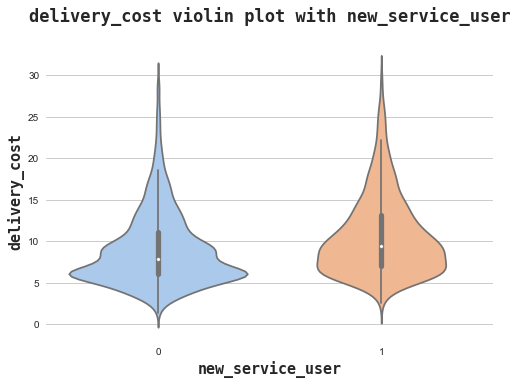

In [ ]:
violin(df, y = "delivery_cost", x= "new_service_user")

From the violin graph we can see that orders with the new service has higher average delivery cost. Let's confirm this with hypothesis testing.

**Hypothesis Testing**

I will determine below if I can use a parametric hypothesis or not for which we need normality and homogeneity of the variances.

**Normality Check with Shapiro Test**

$H_{0}$: The data is normally distributed.  
$H_{1}$: The data is not normally distributed.

In [ ]:
#Dividing Groups
group1 = df[df['new_service_user']==1]['delivery_cost']
group2 = df[df['new_service_user']==0]['delivery_cost']

In [ ]:
check_normality(group1)
check_normality(group2)

p value:0.0000
Reject null hypothesis >> The data is not normally distributed
p value:0.0000
Reject null hypothesis >> The data is not normally distributed


**Homogeneity of Variances with Levene Test**

**Levene Test:**

-   $H_0$: The two samples come from a population having equal variance

-   $H_1$: The two samples come from a population having different variance

In [ ]:
#Applying Levene Test
check_variance_homogeneity(group1, group2)

p value:0.0091
Reject null hypothesis >> The variances of the samples are different.


Since both the normality and homogeneity of variances assumptions of the parametric test are violated I need to use a non-parametric test. Since we have unpaired data with two groups I use Mann-Whitney U test.

State the hypotheses:

- $H_0: η\_1 = η\_2$ (there is no difference in the median delivery cost of the orders using different services)
- $H_1: η\_1 ≠ η\_2$ (there is a difference in the median delivery cost of the orders using different services)

In [ ]:
# Conducting Mann-Whitney U Test 
ttest,pvalue = stats.mannwhitneyu(group1,group2, alternative="two-sided")
print("p-value:%.4f" % pvalue)
if pvalue <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p-value:0.0000
Reject null hypothesis


**At 0.05 significance level we can claim that new service has a significant effect on delivery cost from the average values we already know that orders with new service is associated with more delivery cost.**

### 4.2 New Service's Effect on delivery_distance <a class="anchor" id="delivery-distance-cost"></a>

**Visualization**

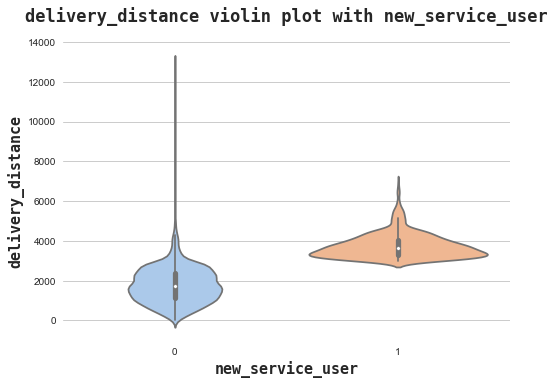

In [ ]:
violin(df, y = "delivery_distance", x= "new_service_user")

From the violin graph we can see that orders with the new service has higher average delivery distance. Let's confirm this with hypothesis testing.

**Hypothesis Testing**

I will determine below if I can use a parametric hypothesis or not for which we need normality and homogeneity of the variances.

**Normality Check with Shapiro Test**

$H_{0}$: The data is normally distributed.  
$H_{1}$: The data is not normally distributed.

In [ ]:
#Dividing Groups
group1 = df[df['new_service_user']==1]['delivery_distance']
group2 = df[df['new_service_user']==0]['delivery_distance']

In [ ]:
check_normality(group1)
check_normality(group2)

p value:0.0000
Reject null hypothesis >> The data is not normally distributed
p value:0.0000
Reject null hypothesis >> The data is not normally distributed


**Homogeneity of Variances with Levene Test**

**Levene Test:**

-   $H_0$: The two samples come from a population having equal variance

-   $H_1$: The two samples come from a population having different variance

In [ ]:
#Applying Levene Test
check_variance_homogeneity(group1, group2)

p value:0.0000
Reject null hypothesis >> The variances of the samples are different.


Since both the normality and homogeneity of variances assumptions of the parametric test are violated I need to use a non-parametric test. Since we have unpaired data with two groups I use Mann-Whitney U test.

State the hypotheses:

- $H_0: η\_1 = η\_2$ (there is no difference in the median delivery cost of the orders using different services)
- $H_1: η\_1 ≠ η\_2$ (there is a difference in the median delivery cost of the orders using different services)

In [ ]:
# Conducting Mann-Whitney U Test 
ttest,pvalue = stats.mannwhitneyu(group1,group2, alternative="two-sided")
print("p-value:%.4f" % pvalue)
if pvalue <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p-value:0.0000
Reject null hypothesis


**At 0.05 significance level we can claim that new service has a significant effect on delivery distance from the average values we already know that orders with new service is associated with longer delivery distance.**

### 4.3 New Service's Effect on delivery_time_min <a class="anchor" id="delivery-time-cost"></a>

**Visualization**

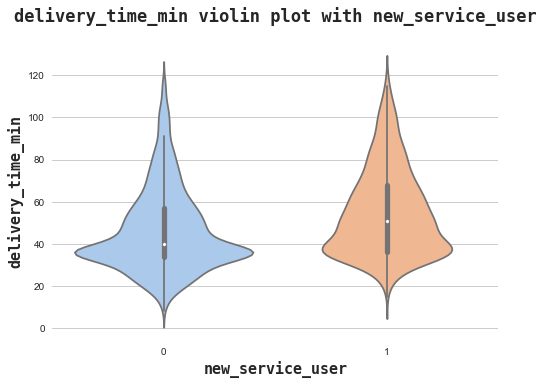

In [ ]:
violin(df, y = "delivery_time_min", x= "new_service_user")

From the violin graph we can see that orders with the new service has longer average delivery time. Let's confirm this with hypothesis testing.

**Hypothesis Testing**

I will determine below if I can use a parametric hypothesis or not for which we need normality and homogeneity of the variances.

**Normality Check with Shapiro Test**

$H_{0}$: The data is normally distributed.  
$H_{1}$: The data is not normally distributed.

In [ ]:
#Dividing Groups
group1 = df[df['new_service_user']==1]['delivery_time_min']
group2 = df[df['new_service_user']==0]['delivery_time_min']

In [ ]:
check_normality(group1)
check_normality(group2)

p value:0.0000
Reject null hypothesis >> The data is not normally distributed
p value:0.0000
Reject null hypothesis >> The data is not normally distributed


**Homogeneity of Variances with Levene Test**

**Levene Test:**

-   $H_0$: The two samples come from a population having equal variance

-   $H_1$: The two samples come from a population having different variance

In [ ]:
#Applying Levene Test
check_variance_homogeneity(group1, group2)

p value:0.0030
Reject null hypothesis >> The variances of the samples are different.


Since both the normality and homogeneity of variances assumptions of the parametric test are violated I need to use a non-parametric test. Since we have unpaired data with two groups I use Mann-Whitney U test.

State the hypotheses:

- $H_0: η\_1 = η\_2$ (there is no difference in the median delivery cost of the orders using different services)
- $H_1: η\_1 ≠ η\_2$ (there is a difference in the median delivery cost of the orders using different services)

In [ ]:
# Conducting Mann-Whitney U Test 
ttest,pvalue = stats.mannwhitneyu(group1,group2, alternative="two-sided")
print("p-value:%.4f" % pvalue)
if pvalue <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p-value:0.0000
Reject null hypothesis


**At 0.05 significance level we can claim that new service has a significant effect on delivery time in minutes from the average values we already know that orders with new service is associated with longer delivery time.**

### 4.4 New Service's Effect on delivered_on_time <a class="anchor" id="delivered-time-cost"></a>

**Visualization**

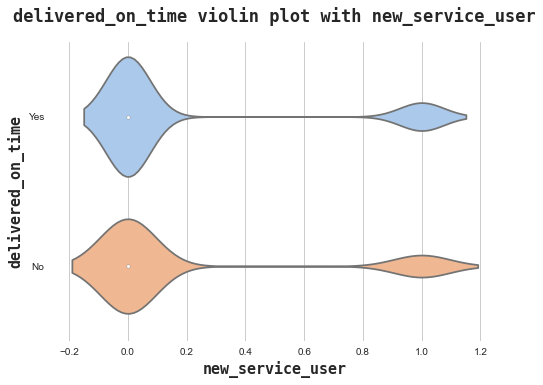

In [ ]:
violin(df, y = "delivered_on_time", x= "new_service_user")

Again we have a categorical variable therefore we will use Chi-Square Independence Test.

State the hypotheses:

-   $H_0:$ There is no relation between the new service and whether delivery is made on time.
-   $H_1:$ There is a relation between the new service and whether delivery is made on time.

In [ ]:
Contingency_Table = pd.crosstab(df['new_service_user'],df['delivered_on_time'], margins = True)
Contingency_Table

delivered_on_time,No,Yes,All
new_service_user,,,
0,949,3104,4053
1,221,724,945
All,1170,3828,4998


In [ ]:
#Conducting Chi Square Test
stats.chi2_contingency(Contingency_Table, correction = True)

(0.00034743640723031713,
 0.9999999849127402,
 4,
 array([[ 948.78151261, 3104.21848739, 4053.        ],
        [ 221.21848739,  723.78151261,  945.        ],
        [1170.        , 3828.        , 4998.        ]]))

**Conclusion:** Since the p-value is greater than 0.05, we fail to reject the null hypothesis at 0.05 significance level. As there is no sufficient evidence that the new service plays a role in delivery being made on time or not.

All in all, from the cost analyses I have found that there is a negative significant effect of the new service on the following variables:


- delivery_cost,
- delivery_distance,
- delivery_time_min.

## 5. Profit Analysis of the New Service  <a class="anchor" id="profit-analysis"></a>

From the benefit analysis I have found the positive impact of the new service: the new service has increased the food prices, delivery fees and income however from the cost analysis I have also found that the orders with the new service had longer distances and associated with higher delivery costs.

At this section I will try to determine if the new service has a positive significant impact on the profit of the company.

In [ ]:
df.groupby(['new_service_user'])['profit'].mean()

new_service_user
0   -0.837670
1   -1.204528
Name: profit, dtype: float64

**Visualization**

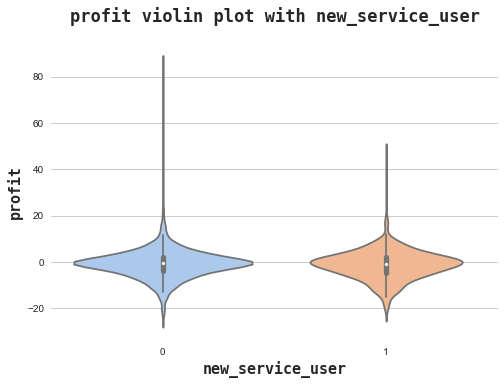

In [ ]:
violin(df, y = "profit", x= "new_service_user")

From the violin graph we can see that orders with the new service has very similar average profit. Let's confirm this with hypothesis testing.

**Hypothesis Testing**

I will determine below if I can use a parametric hypothesis or not for which we need normality and homogeneity of the variances.

**Normality Check with Shapiro Test**

$H_{0}$: The data is normally distributed.  
$H_{1}$: The data is not normally distributed.

In [ ]:
#Dividing Groups
group1 = df[df['new_service_user']==1]['profit']
group2 = df[df['new_service_user']==0]['profit']

In [ ]:
check_normality(group1)
check_normality(group2)

p value:0.0000
Reject null hypothesis >> The data is not normally distributed
p value:0.0000
Reject null hypothesis >> The data is not normally distributed


**Homogeneity of Variances with Levene Test**

**Levene Test:**

-   $H_0$: The two samples come from a population having equal variance

-   $H_1$: The two samples come from a population having different variance

In [ ]:
#Applying Levene Test
check_variance_homogeneity(group1, group2)

p value:0.0305
Reject null hypothesis >> The variances of the samples are different.


Since both the normality and homogeneity of variances assumptions of the parametric test are violated I need to use a non-parametric test. Since we have unpaired data with two groups I use Mann-Whitney U test.

State the hypotheses:

- $H_0: η\_1 = η\_2$ (there is no difference in the median profit of the orders using different services)
- $H_1: η\_1 ≠ η\_2$ (there is a difference in the median profit of the orders using different services)

In [ ]:
# Conducting Mann-Whitney U Test 
ttest,pvalue = stats.mannwhitneyu(group1,group2, alternative="two-sided")
print("p-value:%.4f" % pvalue)
if pvalue <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p-value:0.1459
Fail to reject null hypothesis


**At 0.05 significance level we can claim that new service has no significant effect on profit of the firm.**

## 6. Policy Suggestions <a class="anchor" id="policy-sugg"></a>

In the benefit analysis part I have shown that the new service is associated with higher income for the firm. However commission percentages are lower for the orders with the new service and commission fee is the same. Moreover, I have also shown that costs are also higher for the orders with the new service. As a result, it seems that currently the new service has no value added for the firm. However, for the longer term if the company can 
- **charge higher commission** for the orders with the new service the income might be increased and assuming that the costs are the same then there could be a possibility of profits
- **seek ways to lower the delivery cost** this way profits can be further increased.
- **adopt minumum price for the farther orders**. This way the costs would be the same but income might be increased.

## 7. References <a class="anchor" id="references"></a>

https://www.statlearning.com/

https://www.statology.org/levenes-test-python/

https://www.statology.org/shapiro-wilk-test-python/

https://www.statology.org/chi-square-test-of-independence-python/